# PROJECT-5 "Задача регрессии".

### Варламов Александр (поток DSPR-131)

# 1. Проблема.

### Проблема:

Одна из компаний - агрегаторов услуг такси в Нью-Йорке обратилась с задачей автоматизации бизнес процесса и построения модели машинного обучения по предсказанию общей продолжительности поездки такси в Нью-Йорке и пригороде: 
* "Клиенты заказывают такси из одной точки Нью-Йорка в другую, причем не обязательно конечная точка должна находиться в пределах города. Сколько клиент должен будет за нее заплатить? Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города. В свою очередь время поездки зависит от множества факторов таких как, откуда и куда клиент едет, в какое время суток совершается поездка, погодных условий и так далее."

Таким образом, необходимо разработать алгоритм, способный определять длительность поездки, который сможет прогнозировать ее стоимость самым тривиальным образом, умножая стоимость на заданный тариф. 
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные можно использовать для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.  

### Цели проекта:


**Бизнес-цель:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая цель:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси (задача регрессии).

### Задачи проекта:

1. **Сформировать набор данных** на основе нескольких источников информации;
2. **Спроектировать новые признаки** с помощью Feature Engineering и выявить наиболее значимые при построении модели;
3. **Исследовать предоставленные данные** и выявить закономерности;
4. **Построить несколько моделей** и выбрать из них наилучшую по заданной метрике;
5. **Спроектировать процесс предсказания** времени длительности поездки для новых данных.
6. **Загрузить свое решение на платформу Kaggle** и сравнить результаты с участниками / лидерами в Data Science соревновании.
   
Во время выполнения проекта мы отрабатываем навыки работы с несколькими источниками данных, генерации признаков, разведывательного анализа и визуализации данных, отбора признаков и, конечно же, построения моделей машинного обучения для задачи регрессии с испорльзованием нескольких алгоритмов (линейная регрессия, дерево решений, ансамблевые методы).

Во время выполнения проекта необходимо выполнить все задания и ответить на контрольные вопросы в соответствии с их последовательностью: любое нарушение порядка действий может повлечь невозможность получить верные ответы.


# 2. Сбор и знакомство с данными. Базовый анализ и расширение данных. 

## 2.1. Импорт необходимых библиотек, функций и методов

In [1]:
import numpy as np # библиотека для научных вычислений в python / the fundamental package for scientific computing with python
import pandas as pd # работа с данными / python data analysis library

import datetime as dt # модуль для работы с датой и временем в python / module supplies classes for manipulating dates and times

import matplotlib.pyplot as plt # комплексная библиотека для создания статической, анимированной и интерактивной визуализации на python / comprehensive library for creating static, animated, and interactive visualizations in python
%matplotlib inline
import seaborn as sns # библиотека визуализации данных python, основанная на matplotlib / python data visualization library based on matplotlib
import plotly.express as px # python библиотека для фомирования интерактивных, высококачественных графиков и визуализации данных / python graphing library makes interactive, publication-quality graphs

# библиотека sklearn - python библиотека для машинного обучения построеная на библиотеке scipy / python module for machine learning built on top of scipy
from sklearn.linear_model import LinearRegression # алгоритм линейной регрессии 
from sklearn.linear_model import Ridge # алгоритм линейной регрессии с L2 регуляризацией
from sklearn.tree import DecisionTreeRegressor # алгоритм дерево решений для задач регрессия
from sklearn.ensemble import RandomForestRegressor # алгоритм случайный лес для задач регрессии 
from sklearn.ensemble import GradientBoostingRegressor # алгоритм градиентного бустинга для задач регрессии

from sklearn.metrics import mean_squared_error # метрика средняя квадратичная ошибка
from sklearn.metrics import median_absolute_error # метрика медианная абсолютная ошибка

from sklearn.cluster import KMeans # алгоритм для кластеризации данных

from sklearn.feature_selection import SelectKBest, f_regression # алгоритм для выбора признаков с наивысшими оценками в модели машинного обучения на основе статистических тестов / f-regression одномерный тест линейной регрессии  
from sklearn.preprocessing import MinMaxScaler # алгоритм для масштабирования / перевода значений признаков в диапазон от 0 до 1
from sklearn.preprocessing import PolynomialFeatures # алгоритм для создания полиномиальных признаков в данных
from sklearn.preprocessing import OneHotEncoder # алгоритм кодирования данных (однократное кодирование)

from sklearn.model_selection import GridSearchCV # алгоритм для подбора гипер-праметров в моделях машинного обучения
from sklearn.model_selection import train_test_split # модуль для разделения данных на тренировочную и тестовую (валидационную) выборки

# библиотека scipy - библиотека для научных вычислений на python / fundamental algorithms for scientific computing in python
from scipy.stats import normaltest # тест на проверку выборки на отличие от нормального распределения

import xgboost as xgb # алгоритм экстремального градиентного бустинга из библиотеки xgboost

In [2]:
# фиксируем RANDOM_SEED, для воспроизводимости кода.
RANDOM_SEED = 42

In [3]:
# фиксируем версии установленных пакетов
!pip freeze > requrements.txt

## 2.2. Загрузка данных

In [4]:
# загружаем данные
taxi = pd.read_csv("data/train.csv", sep=",")
holiday = pd.read_csv("data/holiday_data.csv", sep=";")
weather = pd.read_csv("data/weather_data.csv", sep=",")
osrm = pd.read_csv("data/osrm_data_train.csv", sep=",")

### Dataset "taxi" - данные с информацией о поездках такси

In [5]:
# выводим информацию о табличной структуре данных (голова - хвост)
display(taxi.head(2))
display(taxi.tail(1))

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.78175,-73.972809,40.790585,N,198


In [6]:
# выводим информацию о данных с использованием метода info()
display(taxi.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


None

In [7]:
# выводим статистическую информацию о признаках с помощью функции describe()
display(taxi.describe())

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [8]:
# выводим статистическую информацию о признаках типа object с помощью функции describe()
display(taxi.describe(include='object'))

,id,pickup_datetime,dropoff_datetime,store_and_fwd_flag
count,1458644,1458644,1458644,1458644
unique,1458644,1380222,1380377,2
top,id2875421,2016-03-04 08:07:34,2016-02-19 19:25:04,N
freq,1,5,5,1450599


### Dataset "holiday" - праздники.

In [9]:
# выводим информацию о табличной структуре данных (голова - хвост)
display(holiday.head(1))
display(holiday.tail(1))

,day,date,holiday
0,Friday,2016-01-01,New Years Day


,day,date,holiday
13,Tuesday,2016-11-08,Election Day


In [10]:
# выводим информацию о данных с использованием метода info()
display(holiday.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   day      14 non-null     object
 1   date     14 non-null     object
 2   holiday  14 non-null     object
dtypes: object(3)
memory usage: 464.0+ bytes


None

### Dataset "weather" - погода.

In [11]:
# выводим информацию о табличной структуре данных (голова - хвост)
display(weather.head(2))
display(weather.tail(1))

,time,temperature,windchill,heat index,humidity,pressure,dew Point,visibility,wind dir,wind speed,gust speed,precip,events,conditions,date,hour
0,2015-12-31 02:00:00,7.8,7.1,NaN,0.89,1017.0,6.1,8.0,NNE,5.6,0.0,0.8,NaN,Overcast,2015-12-31,2
1,2015-12-31 03:00:00,7.2,5.9,NaN,0.90,1016.5,5.6,12.9,Variable,7.4,0.0,0.3,NaN,Overcast,2015-12-31,3


,time,temperature,windchill,heat index,humidity,pressure,dew Point,visibility,wind dir,wind speed,gust speed,precip,events,conditions,date,hour
8786,2017-01-02 01:00:00,5.0,2.1,NaN,0.43,1030.1,-6.7,16.1,ENE,13.0,0.0,0.0,NaN,Clear,2017-01-02,1


In [12]:
# выводим информацию о данных с использованием метода info()
display(weather.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8787 entries, 0 to 8786
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         8787 non-null   object 
 1   temperature  8787 non-null   float64
 2   windchill    2295 non-null   float64
 3   heat index   815 non-null    float64
 4   humidity     8787 non-null   float64
 5   pressure     8556 non-null   float64
 6   dew Point    8787 non-null   float64
 7   visibility   8787 non-null   float64
 8   wind dir     8787 non-null   object 
 9   wind speed   8787 non-null   float64
 10  gust speed   8787 non-null   float64
 11  precip       8787 non-null   float64
 12  events       455 non-null    object 
 13  conditions   8787 non-null   object 
 14  date         8787 non-null   object 
 15  hour         8787 non-null   int64  
dtypes: float64(10), int64(1), object(5)
memory usage: 1.1+ MB


None

### Dataset "OSRM" - данные о кратчайшем маршруте.

In [13]:
# выводим информацию о табличной структуре данных (голова - хвост)
display(osrm.head(2))
display(osrm.tail(1))

,id,starting_street,end_street,total_distance,total_travel_time,number_of_steps,street_for_each_step,distance_per_step,travel_time_per_step,step_maneuvers,step_direction,step_location_list
0,id2875421,Columbus Circle,East 65th Street,2009.1,164.9,5,Columbus Circle|Central Park West|65th Street ...,0|576.4|885.6|547.1|0,0|61.1|60.1|43.7|0,depart|rotary|turn|new name|arrive,left|straight|right|straight|arrive,"-73.982316,40.767869|-73.981997,40.767688|-73...."
1,id2377394,2nd Avenue,Washington Square West,2513.2,332.0,6,2nd Avenue|East 13th Street|5th Avenue|Washing...,877.3|836.5|496.1|164.2|139.1|0,111.7|109|69.9|25.8|15.6|0,depart|turn|turn|end of road|continue|arrive,none|right|left|right|left|arrive,"-73.980429,40.73857|-73.985444,40.731658|-73.9..."


,id,starting_street,end_street,total_distance,total_travel_time,number_of_steps,street_for_each_step,distance_per_step,travel_time_per_step,step_maneuvers,step_direction,step_location_list
1458642,id0995846,Terminal 8 departures,West 106th Street,30302.5,1675.8,20,Terminal 8 departures|Cargo Plaza|Cargo Plaza|...,493.4|436.6|238.9|8759.3|703.1|3806.4|5006.7|1...,73|64.8|19|350|56.3|152.4|200.6|115.1|81.1|179...,depart|fork|on ramp|new name|off ramp|merge|fo...,right|slight right|straight|straight|slight le...,"-73.789512,40.647057|-73.788279,40.645582|-73...."


In [14]:
# выводим информацию о данных с использованием метода info()
display(osrm.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458643 entries, 0 to 1458642
Data columns (total 12 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1458643 non-null  object 
 1   starting_street       1458643 non-null  object 
 2   end_street            1458643 non-null  object 
 3   total_distance        1458643 non-null  float64
 4   total_travel_time     1458643 non-null  float64
 5   number_of_steps       1458643 non-null  int64  
 6   street_for_each_step  1458643 non-null  object 
 7   distance_per_step     1458643 non-null  object 
 8   travel_time_per_step  1458643 non-null  object 
 9   step_maneuvers        1458643 non-null  object 
 10  step_direction        1458643 non-null  object 
 11  step_location_list    1458643 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 133.5+ MB


None

In [15]:
# выводим информацию о данных с использованием метода info()
display(osrm.describe())

,total_distance,total_travel_time,number_of_steps
count,1.458643e+06,1.458643e+06,1.458643e+06
mean,4.626383e+03,3.893719e+02,7.547126e+00
std,5.303878e+03,3.144679e+02,4.432504e+00
min,0.000000e+00,0.000000e+00,2.000000e+00
25%,1.666100e+03,1.815000e+02,5.000000e+00
50%,2.755100e+03,2.895000e+02,6.000000e+00
75%,5.113800e+03,4.907000e+02,9.000000e+00
max,9.420420e+04,5.135400e+03,4.600000e+01


In [16]:
# выводим информацию о данных с использованием метода info()
display(osrm.describe(include=object))

,id,starting_street,end_street,street_for_each_step,distance_per_step,travel_time_per_step,step_maneuvers,step_direction,step_location_list
count,1458643,1458643,1458643,1458643,1458643,1458643,1458643,1458643,1458643
unique,1458643,2592,5508,668803,1424248,1402106,81185,228277,1458156
top,id2875421,Broadway,Broadway,2nd Avenue|2nd Avenue,0|0,0|0,depart|turn|turn|turn|arrive,none|arrive,"-73.954614,40.820981|-73.954614,40.820981"
freq,1,64958,48619,4279,6009,6544,154879,27599,39


### Краткие выводы и комментарии:

**Dataset "taxi":**

1. Dataset содержит 1 458 644 наблюдения и имеет 11 признаков;
2. Данные представлены следующими типами: int64 - 3 признака; float64 - 4 признака, object - 4 признака (2 из которых это дата и время поездки);
3. Пропусков данных согласно метода info() - нет, но стоит обратить внимание на признак "passenger_count" - где присутсвуют 0 количество пасажиров;
4. Признаки 'pickup_datetime' 'dropoff_datetime' имеет тип данных 'object', но представляют собой данные о дате и времени поездки;
5. Так же необходимо обратить внимание на выбросы, особенно в целевом признаке - 'trip_duration': min = 1, max = 3 526 282; 
6. Признаки можно разделить на несколько категорий и расшифровать:

*Данные о клиенте и таксопарке:*
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

*Временные характеристики:*
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

*Географическая информация:*
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

*Прочие признаки:*
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

*Целевой признак:*
* trip_duration - продолжительность поездки в секундах


**Dataset "holiday":**

1. Dataset содержит 14 наблюдения и имеет 1 признак, в котором представлена справочная информация о дне неделе, дате и наименовании праздничного дня;
2. Данные представлены следующими типами: object - 1 признак; 
3. Служит для формирования вспомогательных признаков.

**Dataset "weather":**

1. Dataset содержит 8787 наблюдения и имеет 16 признаков, в котором представлена справочная информация о погоде в зависимости от даты и часа поездки;
2. Данные представлены следующими типами: float(64) - 10 признаков, int(64) - 1 признак, object - 5 признаков; 
3. Служит для формирования вспомогательных признаков.

**Dataset "osrm":**

1. Dataset содержит 1458643 наблюдения и имеет 12 признаков, в котором представлена справочная информация о маршруте;
2. Данные представлены следующими типами: float(64) - 2 признака, int(64) - 1 признак, object - 9 признаков; 
3. Служит для формирования вспомогательных признаков;
4. В рамках проекта необходимо выделить и расшифровать следующие признаки:
   * id - индетификатор поездки,
   * starting_street - наименование улицы начала поездки,
   * end_street - наименование улицы окончания поездки,
   * total_distance - кратчайшее дорожное растояние (в метрах) согласно ORSM,
   * total_travel_time - наименьшее время поездки (в секундах) согласно ORSM, 
   * number_of_steps - количество дискретных шагов, которые должен выполнить водитель (поворот налево, направо и т.д).

## 2.3. Базовый анализ и расширение данных.

### Задание 2.1

Переведем признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S').

Вопросы:

1. Определить временные рамки (без учета времени), за которые представлены данные.

In [17]:
# выводим информацию согласно вопросов
taxi['pickup_datetime'] = pd.to_datetime(taxi['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
min_date = taxi['pickup_datetime'].min()
max_date = taxi['pickup_datetime'].max()
print(f'Данные в dataset представлены за период с {min_date} по {max_date}.')

Данные в dataset представлены за период с 2016-01-01 00:00:17 по 2016-06-30 23:59:39.


### Задание 2.2

Вопросы:

1. Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

In [18]:
# выводим информацию согласно вопросов
total_data_is_null = taxi.isna().sum().sum()
print(f'Общее количество пропусков в данных составляет: {total_data_is_null} ячеек.')

Общее количество пропусков в данных составляет: 0 ячеек.


### Задание 2.3

Вопросы:

1. Сколько уникальных таксопарков присутствует в данных?
2. Каково максимальное количество пассажиров?
3. Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.
4. Чему равно минимальное и максимальное время поездки (в секундах)?

In [19]:
# выводим информацию согласно вопросов
print('Количество уникальных таксопарков составляет = {}.'.format(taxi['vendor_id'].nunique()))
print('Максимальное количество пасажиров в 1 поездке составило = {} человек.'.format(taxi['passenger_count'].max()))
mean_duration = taxi['trip_duration'].mean()
median_duration = taxi['trip_duration'].median()
print('Среднее время поездки составило = {} сек., медианное время поездки = {} сек.'.format(round(mean_duration, 0), round(median_duration, 0)))
print('Минимальное время 1 поездке составило = {} сек., и максимальное = {} сек.'.format(taxi['trip_duration'].min(), taxi['trip_duration'].max()))

Количество уникальных таксопарков составляет = 2.
Максимальное количество пасажиров в 1 поездке составило = 9 человек.
Среднее время поездки составило = 959.0 сек., медианное время поездки = 662.0 сек.
Минимальное время 1 поездке составило = 1 сек., и максимальное = 3526282 сек.


### Задание 2.4

Опишем и реализуем функцию add_datetime_features(), которая принимает на вход dataframe с данными о поездках и возвращает тот же dataframe с добавленными в нее 3 новых признаков:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - наименование дня недели, в который был включен счетчик.

Вопросы:
1. Сколько поездок было совершено в субботу?
2. Сколько поездок в среднем совершается в день? Ответ округлите до целого.

In [20]:
# описываем функцию
def add_datetime_features(data, feature='pickup_datetime', new_feature_1='pickup_date', new_feature_2='pickup_hour', new_feature_3='pickup_dayofweek'):
    """
    Функция, которая преобразует признак типа datetime в 3 новых признака: дата, час и порядковый номер дня недели.
    
    Args:
        data (pd.Dataframe()): исходный Dataframe
        feature (str): преобразуемый признак (type - datetime)
        new_feature_1 (str): имя создаваемого признака 1, выделение даты (date)
        new_feature_2 (str): имя создаваемого признака 2, выделение часа (hour)
        new_feature_3 (str): имя создаваемого признака 3, выделение номера дня недели (dayofweek)
        
    Returns:
        data (pd.Dataframe()): преобразованный Dataframe с добавлением 3-х новых признаков: feature_name_1, feature_name_2, feature_name_3
    """
    import datetime as dt
    data[feature] = pd.to_datetime(data[feature], format='%Y-%m-%d %H:%M:%S')
    data[new_feature_1] = data[feature].dt.date
    data[new_feature_2] = data[feature].dt.hour
    data[new_feature_3] = data[feature].dt.day_name() #получаем наименование дня недели в виде строки (weekday - число)

    return data

In [21]:
# реализуем функцию
taxi = add_datetime_features(taxi)

In [22]:
# выводим информацию согласно вопросов
mask_suturday = taxi['pickup_dayofweek'] == 'Saturday'
total_trips_of_saturday = taxi[mask_suturday]['id'].count()
print(f'Обшее количество поездок совершенное по суботам составило - {total_trips_of_saturday} ед.')
mean_trips_per_day = taxi.groupby('pickup_date')['id'].count().mean().round(0)
print(f'Среднее количество поездок в день составило - {mean_trips_per_day.round(0)} ед.')

Обшее количество поездок совершенное по суботам составило - 220868 ед.
Среднее количество поездок в день составило - 8015.0 ед.


### Задание 2.5

Опишем и реализуем функцию add_holiday_features(), которая принимает на вход два dataframe: 
* с данными о поездках;
* с данными о праздничных днях;

и возвращает обновленный dataframe с данными о поездках с добавленным в нее нового признака pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет). 

Вопросы:

1. Чему равна медианная длительность поездки на такси в праздничные дни (ответ приведите в секундах, округлив до целого)?

In [23]:
# описываем функцию
def add_holiday_features(data, data_2, feature='pickup_date', feature_2='date', new_feature='pickup_holiday'):
    """
    Функция, которая объединяет 2 dataset и создает новый бинарный признак pickup_holiday, который отражает относится данный день к празднечному дню = 1 или нет = 0.
    
    Args:
        data (pd.Dataframe()): исходный Dataframe
        data_2 (pd.Dataframe()): Dataframe c данными о праздничных днях в году
        feature (str): сравниваемый признак типа - datetime в исходном pd.Dataframe - date
        feature_2 (str): сравниваемый признак типа - datetime в исходном pd.Dataframe - date_2
        new_feature (str): новый создаваемый признак 
        
    Returns:
        data (pd.Dataframe()): преобразованный исходный Dataframe с добавлением бинарного признака pickup_holiday.
    """
    data[feature] = pd.to_datetime(data[feature], format='%Y-%m-%d').dt.date
    data_2[feature_2] = pd.to_datetime(data_2[feature_2], format='%Y-%m-%d').dt.date

    features_2_list = []
    
    for i in range(len(data_2[feature_2])):
        features_2_list.append(data_2[feature_2][i])
        
    data[new_feature] = data[feature].apply(lambda x: 1 if x in features_2_list else 0)
   
    return data

In [24]:
# реализуем функцию
taxi = add_holiday_features(taxi, holiday)

In [25]:
# выводим информацию согласно вопросов
masc_holiday_1 = taxi['pickup_holiday'] == 1
median_time_in_holiday = taxi[masc_holiday_1]['trip_duration'].median()
print(f'Медианная длительность поездки в празднечные дни составляет {round(median_time_in_holiday, 0)} сек.')

Медианная длительность поездки в празднечные дни составляет 585.0 сек.


### Задание 2.6

Опишем и реализуем функцию add_osrm_features(), которая принимает на вход два dataframe:
* с данными о поездках;
* с данными из OSRM (справка о OSRM приведена в конце jupiter notebook);

и возвращает обновленный dataframe с данными о поездках с добавленными в нее 3 новых признаков:
* total_distance;
* total_travel_time;
* number_of_steps.

Вопросы:

1. Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM?
2. Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц? 

In [26]:
# описываем функцию
def add_osrm_features(data, data_2, feature='id', feature_2='id', add_feature_1='total_distance', add_feature_2='total_travel_time', add_feature_3='number_of_steps'):
    """
    Функция, которая в исходный dataset добавляет справочные признаки из dataset с дополнительными данными.
    
    Args:
        data (pd.Dataframe()): исходный Dataframe
        data_2 (pd.Dataframe()): Dataframe c дополнительными данными
        feature (str): сравниваемый признак в исходном pd.Dataframe - date
        feature_2 (str): сравниваемый признак в pd.Dataframe с дополнительными данными - date_2
        add_feature_1 (str): добавляемый признак 1 из data_2
        add_feature_2 (str): добавляемый признак 2 из data_2
        add_feature_3 (str): добавляемый признак 3 из data_2 
        
    Returns:
        data (pd.Dataframe()): преобразованный исходный Dataframe с добавлением новых признаков.
    """
    data = pd.merge(data, data_2[[feature_2 ,add_feature_1, add_feature_2, add_feature_3]], how='left', left_on=feature, right_on=feature_2)
   
    return data

In [27]:
# реализуем функцию
taxi = add_osrm_features(taxi, osrm)

In [28]:
# выводим информацию согласно вопросов
median_trip_duration = taxi['trip_duration'].median()
median_total_travel_time = taxi['total_travel_time'].median()
print(f'Разница между фактическим медианным временем поездки и расчетной с помощью модуля ORSM составляет {round((median_trip_duration - median_total_travel_time), 0)} сек.')

missing_values = taxi.isna()
missing_values_per_row = missing_values.sum(axis=1)
rows_with_missing_values = (missing_values_per_row > 0).sum()
print(f'Количество строк с пропусками после добавления новых признаков = {rows_with_missing_values}.')

Разница между фактическим медианным временем поездки и расчетной с помощью модуля ORSM составляет 372.0 сек.
Количество строк с пропусками после добавления новых признаков = 1.


### Задание 2.7.

Опишем и реализуем функцию add_geographical_features(), которая принимает на вход dataframe с данными о поездках и возвращает обновленный dataframe с добавленнем в нее 2 новых признаков:

* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

Вопросы:

1. Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых.

In [29]:
# описываем функцию
def add_geographical_features(data, add_feature_1='haversine_distance', add_feature_2='direction'):
    """
    Функция, которая в исходный dataset добавляет 2 дополнительных признака:
    * haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
    * direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.
    
    Args:
        data (pd.Dataframe()): исходный Dataframe
        
        
    Returns:
        data (pd.Dataframe()): преобразованный исходный Dataframe с добавлением новых признаков.
    """
    
    def get_haversine_distance(lat1, lng1, lat2, lng2):
        # переводим углы в радианы
        lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
        # радиус земли в километрах
        EARTH_RADIUS = 6371 
        # считаем кратчайшее расстояние h по формуле Хаверсина
        lat_delta = lat2 - lat1
        lng_delta = lng2 - lng1
        d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
        h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
        return h


    def get_angle_direction(lat1, lng1, lat2, lng2):
        # переводим углы в радианы
        lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
        # считаем угол направления движения alpha по формуле угла пеленга
        lng_delta_rad = lng2 - lng1
        y = np.sin(lng_delta_rad) * np.cos(lat2)
        x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
        alpha = np.degrees(np.arctan2(y, x))
        return alpha

    data[add_feature_1] = get_haversine_distance(data['pickup_latitude'], data['pickup_longitude'], data['dropoff_latitude'], data['dropoff_longitude'])
    data[add_feature_2] = get_angle_direction(data['pickup_latitude'], data['pickup_longitude'], data['dropoff_latitude'], data['dropoff_longitude'])

    return data

In [30]:
# реализуем функцию
taxi = add_geographical_features(taxi)

In [31]:
# выводим информацию согласно запроса
median_haversine_distance = taxi['haversine_distance'].median()
print(f'Медианное растояние по формуле гаверсинуса для поездок составляет {round(median_haversine_distance, 2)} км.')

Медианное растояние по формуле гаверсинуса для поездок составляет 2.09 км.


### Задание 2.8.

Опишем и реализуем функцию add_cluster_features(), которая принимает на вход dataframe с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновленный dataframe с добавленными в нее нового признака geo_cluster - географический кластер, к которому относится поездка.

Вопросы:

1. Сколько поездок содержится в наименьшем по размеру географическом кластере?

In [32]:
# описываем функцию
def add_cluster_features(data, new_feature='geo_cluster'):
    """
    Функция, которая в исходный dataset добавляет признак geo_cluster - географический кластер к которому относится поездка.
    
    Args:
        data (pd.Dataframe()): исходный Dataframe
        
        
    Returns:
        data (pd.Dataframe()): преобразованный исходный Dataframe с добавлением нового признака.
    """

    # создаем обучающую выборку из географических координат всех точек
    coords = np.hstack((data[['pickup_latitude', 'pickup_longitude']],
                    data[['dropoff_latitude', 'dropoff_longitude']]))
    # обучаем алгоритм кластеризации
    kmeans = KMeans(n_clusters=10, random_state=RANDOM_SEED)
    kmeans.fit(coords)

    data[new_feature] = kmeans.predict(coords)

    return data

In [33]:
# реализуем функцию
taxi = add_cluster_features(taxi)

/Users/alexander.v.varlamov/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [34]:
# выводим информацию согласно вопросов
total_trains_for_clusters = taxi.groupby(by='geo_cluster')['id'].count().sort_values()
print(f'Количество поездок в наименьшем по размеру географическом кластере составляет - {total_trains_for_clusters.min()} поездки.')

Количество поездок в наименьшем по размеру географическом кластере составляет - 2 поездки.


### Задание 2.9.

Опишем и реализуем функцию add_weather_features(), которая принимает на вход 2 dataframe:
* с данными о поездках;
* с данными о погодных условиях на каждый час;

и возвращает обновленный dataframe с данными о поездках с добавленными в нее новых признаков:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

Вопросы:

1. Сколько поездок было совершено в снежную погоду?
2. Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента.


In [35]:
# описываем функцию
def add_weather_features(data, data_2, feature='pickup_date',feature_='pickup_hour', feature_2='date', feature_2_='hour', add_feature_1='temperature', add_feature_2='visibility', add_feature_3='wind speed', add_feature_4='precip', add_feature_5='events'):
    """
    Функция, которая в исходный dataset добавляет справочные признаки из dataset с дополнительными данными.
    
    Args:
        data (pd.Dataframe()): исходный Dataframe
        data_2 (pd.Dataframe()): Dataframe c дополнительными данными
        feature (str): сравниваемый признак в исходном pd.Dataframe - date
        feature_2 (str): сравниваемый признак в pd.Dataframe с дополнительными данными - date_2
        add_feature_1 (str): добавляемый признак 1 из data_2
        add_feature_2 (str): добавляемый признак 2 из data_2
        add_feature_3 (str): добавляемый признак 3 из data_2
        add_feature_4 (str): добавляемый признак 3 из data_2 
        add_feature_5 (str): добавляемый признак 3 из data_2  
        
    Returns:
        data (pd.Dataframe()): преобразованный исходный Dataframe с добавлением новых признаков.
    """
    data_2 = data_2[[feature_2, feature_2_, add_feature_1, add_feature_2, add_feature_3, add_feature_4, add_feature_5]]
    data[feature] = pd.to_datetime(data[feature], format='%Y-%m-%d')
    data_2[feature_2] = pd.to_datetime(data_2[feature_2], format='%Y-%m-%d')
    #data_2[feature_2_] = pd.to_datetime(data_2[feature_2_]).dt.hour
    data = pd.merge(data, data_2, how='left', left_on=[feature, feature_], right_on=[feature_2, feature_2_])
    data = data.drop(columns=['date', 'hour'], axis=1)
   
    return data

In [36]:
# реализуем функцию
taxi = add_weather_features(taxi, weather)

/var/folders/8c/t4hdh9954tg2trks19jq1b8m0000gn/T/ipykernel_54684/4110003208.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2[feature_2] = pd.to_datetime(data_2[feature_2], format='%Y-%m-%d')


In [37]:
# выводим информацию согласно вопросов
mask_snow = taxi['events'] == 'Snow'
nambers_train_in_snow = taxi[mask_snow]['id'].count() 
print(f'Количество поездок совершенных в снежную погоду составляет: {nambers_train_in_snow} ед.')
null_percentage = (taxi[['temperature', 'visibility', 'wind speed', 'precip']].isnull().sum().sum())*100 / taxi[['temperature', 'visibility', 'wind speed', 'precip']].size
print(f'Пропуски в признаках с погодными условиями от общего количества наблюдений в данных признаках составляют: {null_percentage.round(2)}%.')

Количество поездок совершенных в снежную погоду составляет: 13126 ед.
Пропуски в признаках с погодными условиями от общего количества наблюдений в данных признаках составляют: 0.82%.


### Задание 2.10.

Опишем и реализуем функцию fill_null_weather_data(), которая принимает на вход dataframe с данными о поездках. Функция должна заполнять пропущенные значения в столбцах:
* пропуски в столбцах с погодными условиями -  temperature, visibility, wind speed, precip заполните медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируем данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски. 
* пропуски в столбце events заполните строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана). 
* пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполните медианным значением по столбцам. 

Вопросы:
1. Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.

In [38]:
# описываем функцию
def fill_null_weather_data(data):
    """
    Функция, которая в исходный dataset заполняет пропущенные значения.
    
    Args:
        data (pd.Dataframe()): исходный Dataframe
        
    Returns:
        data (pd.Dataframe()): преобразованный исходный Dataframe с заполненными значениями.
    """
    data['temperature'] = data['temperature'].fillna(data.groupby('pickup_date')['temperature'].transform('median'))
    data['visibility'] = data['visibility'].fillna(data.groupby('pickup_date')['visibility'].transform('median'))
    data['wind speed'] = data['wind speed'].fillna(data.groupby('pickup_date')['wind speed'].transform('median'))
    data['precip'] = data['precip'].fillna(data.groupby('pickup_date')['precip'].transform('median'))
    data['events'] = data['events'].fillna('None')
    data['total_distance'] = data['total_distance'].fillna(data['total_distance'].median())
    data['total_travel_time'] = data['total_travel_time'].fillna(data['total_travel_time'].median())
    data['number_of_steps'] = data['number_of_steps'].fillna(data['number_of_steps'].median())
   
    return data

In [39]:
# реализуем функцию
taxi = fill_null_weather_data(taxi)

In [40]:
# выводим информацию согласно вопросов:
median_temperature = taxi['temperature'].median()
print(f'Медианная температура после заполнения пропусков составляет - {median_temperature} градусов.')

Медианная температура после заполнения пропусков составляет - 11.1 градусов.


### Рассмотрим целевую переменную - trip_duration (длительность поездки) на предмет наличия выбросов.


Text(0, 0.5, 'Время поездки, дней.')

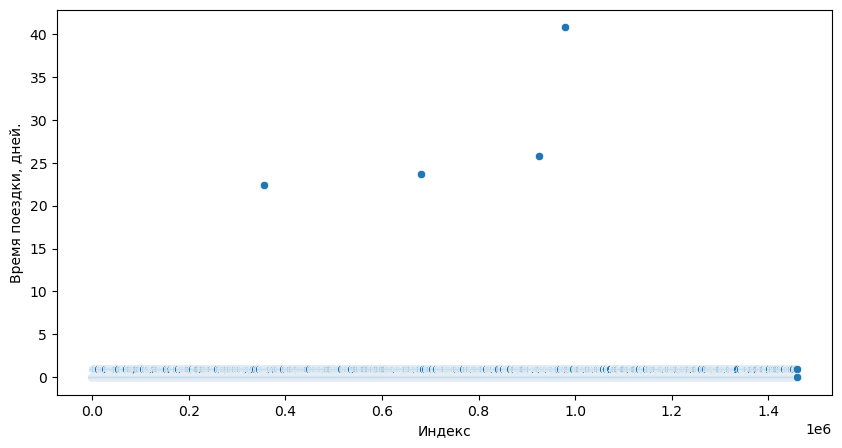

In [41]:
# формируем и выводим график продолжительности поездок в сутках
fig, ax = plt.subplots(figsize=(10, 5))
trip_duration_day = taxi['trip_duration']/60/60/24
sns.scatterplot(data=taxi, x=trip_duration_day.index, y=trip_duration_day, ax=ax)
ax.set_xlabel('Индекс')
ax.set_ylabel('Время поездки, дней.')

<Axes: xlabel='trip_duration', ylabel='Count'>

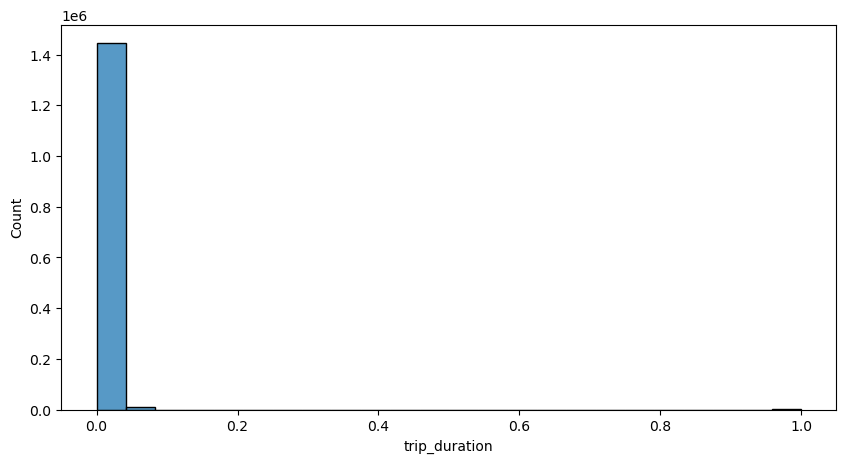

In [42]:
# формируем и выводим график распределения поездок до 24 часов
day = 60 * 60 * 24
mask_24 = taxi['trip_duration'] <= day
trip_duration_24 = taxi[mask_24]['trip_duration']/60/60/24
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(trip_duration_24, bins=24)

**Комментарии:**
1. Мы видим, что в данных присутсвуют наблюдения для которых время поездки составляет от 20 до 40+ дней;
2. На гистограмме, распределения количества поездок до 24 часов, основное количество поездок сосредоточено в интервале до 3 часов.

***Введем ограничение - выбросами считаем поездки, время которых составляет более 24 часов.*** 


Сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды. 
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом: 
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


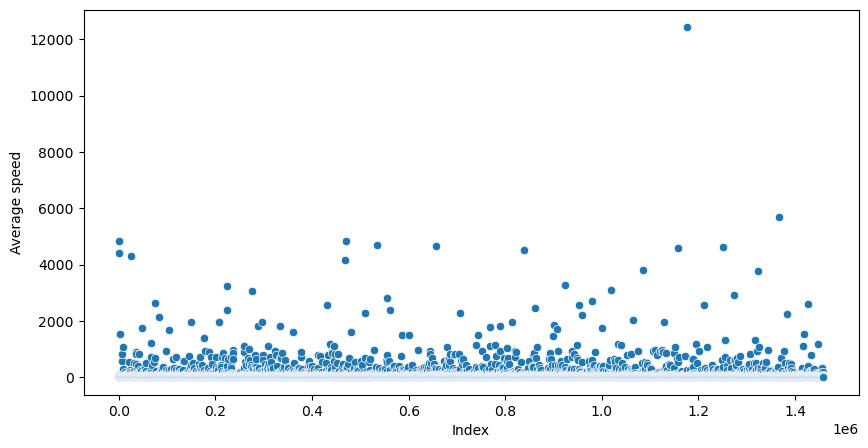

In [43]:
# формируем и выводим график средней скорости поездок такси
avg_speed = taxi['total_distance'] / taxi['trip_duration'] * 3.6
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Average speed');

**Комментарии:**
1. Мы видим, что в данных присутсвуют наблюдения для которых средняя скорость составляет более 1000 км/ч (max => 12000 км/ч!). 

***Введем ограничение - предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч. Остальное считаем выбросами и удалим.*** 


### Задание 2.11.

* Определим и удалим поездки, длительность которых превышает 24 часа.
* Определим и удалим поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч.

Вопросы:

1. Сколько выбросов по признаку длительности поездки вам удалось найти?
2. Сколько выбросов по признаку скорости вам удалось найти?

In [44]:
# выводим информацию согласно запроса
time_24 = 60 * 60 * 24
masc_trip_duration = taxi['trip_duration'] < time_24
avg_speed = 300 * 1000 / 60 / 60
masc_avg_speed = (taxi['total_distance'])/ (taxi['trip_duration']) < avg_speed
print(f'Количество поездок (выбросов) с длительностью более 24 часов составляет - {taxi.shape[0] - taxi[masc_trip_duration].shape[0]} ед.')
print(f'Количество поездок (выбросов) со средней скоростью более 300 км/час составляет - {taxi.shape[0] - taxi[masc_avg_speed].shape[0]} ед.')

Количество поездок (выбросов) с длительностью более 24 часов составляет - 4 ед.
Количество поездок (выбросов) со средней скоростью более 300 км/час составляет - 407 ед.


In [45]:
# формируем преобразованный и очищенный DataFrame - удаляем поездки с длительностью более 24 часов и средней скоростью более 300 км/час.
taxi_cleen = taxi[masc_trip_duration & masc_avg_speed].reset_index(drop=True) # сбрасываем индексы
taxi_cleen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458233 entries, 0 to 1458232
Data columns (total 26 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458233 non-null  object        
 1   vendor_id           1458233 non-null  int64         
 2   pickup_datetime     1458233 non-null  datetime64[ns]
 3   dropoff_datetime    1458233 non-null  object        
 4   passenger_count     1458233 non-null  int64         
 5   pickup_longitude    1458233 non-null  float64       
 6   pickup_latitude     1458233 non-null  float64       
 7   dropoff_longitude   1458233 non-null  float64       
 8   dropoff_latitude    1458233 non-null  float64       
 9   store_and_fwd_flag  1458233 non-null  object        
 10  trip_duration       1458233 non-null  int64         
 11  pickup_date         1458233 non-null  datetime64[ns]
 12  pickup_hour         1458233 non-null  int32         
 13  pickup_dayof

# 3. Разведывательный анализ данных (EDA)

Основной метрикой качества решения поставленной задачи принимаем **RMSLE - Root Mean Squared Log Error**, которая вычисляется на основе целевой переменной в логарифмическом масштабе. 


В данном случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.


In [46]:
# создадим признак целевой переменной в логарифмическом масштабе
taxi_cleen['trip_duration_log'] = np.log(taxi_cleen['trip_duration']+1)

**Комментарий**: для того, чтобы вернуться от логарифмического масштаба к истинному будет использоваться формула
$$trip\_duration = exp(trip\_duration\_log) - 1$$


### Задание 3.1.

Построим гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log) оценки признака на нормальность распределения. 
Проверим распределение признака с помощью теста Д’Агостино при уровне значимости $\alpha=0.05$. 

Вопросы:

1. Чему равен вычисленный p-value? Ответ округлите до сотых.
2. Является ли распределение длительности поездок в логарифмическом масштабе нормальным?

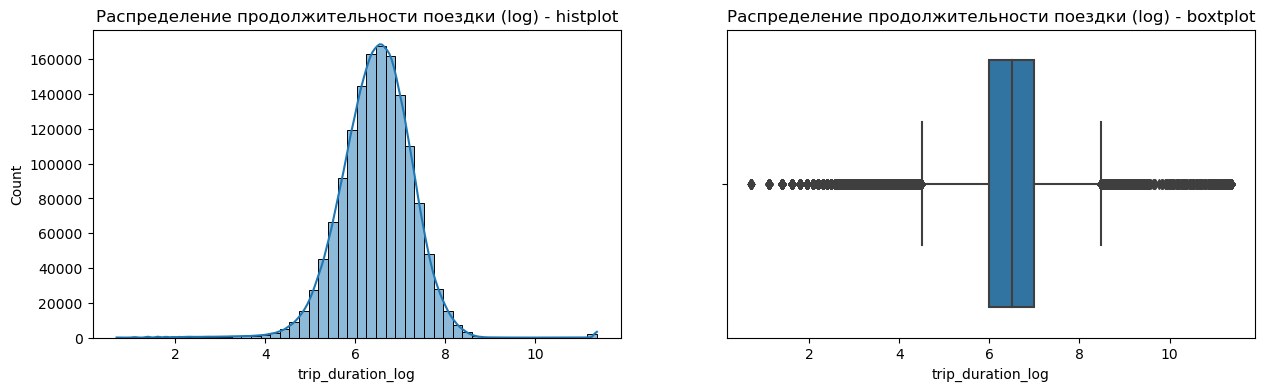

In [47]:
# строим гистограмму и коробчатую диаграмму для визуальной оценки
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
hisplot = sns.histplot(data=taxi_cleen, x='trip_duration_log', kde=True, bins=50, ax=axes[0]);
hisplot.set_title('Распределение продолжительности поездки (log) - histplot');
boxplot = sns.boxplot(data=taxi_cleen, x='trip_duration_log', ax=axes[1]);
boxplot.set_title('Распределение продолжительности поездки (log) - boxtplot');

In [48]:
# описываем функцию
def test_normality(data, alpha=0.05):
    """
    Функция обеспечивающая проверку признака на нормальность данных методом Д'Агостино
    
    Args:
        data (pd.Series): набор данных для проверки на нормальность.
        alpha (float, по умолчанию 0.05): уровень значимости для проверки на нормальность. Если p-value меньше указанного уровня значимости,
        то гипотеза о нормальности отвергается.
    
    Returns:
        result: результат проверки на нормальность. True если данные прошли тест на нормальность, False если не прошли.
    print: вывод на печать результата
    """
    H0 = 'Данные распределены нормально' # Нулевая гипотеза
    Ha = 'Данные распределены отлично от нормального (мы отвергаем H0)' # Альтернативная гипотеза
    stat, p = normaltest(data)
    result = p > alpha
    return print((Ha, H0) [p > alpha]), p

In [49]:
# реализуем функцию
test_normality(taxi_cleen['trip_duration_log'])

Данные распределены отлично от нормального (мы отвергаем H0)


/var/folders/8c/t4hdh9954tg2trks19jq1b8m0000gn/T/ipykernel_54684/2925459429.py:19: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return print((Ha, H0) [p > alpha]), p


(None, 0.0)

### Задание 3.2.

Построим график, который позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id). 

Сравним два распределения между собой.

<Axes: xlabel='vendor_id', ylabel='count'>

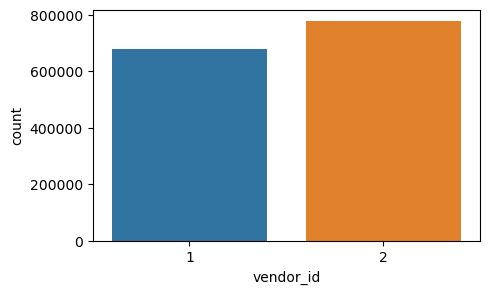

In [50]:
# построим диаграмму распределения данных между таксопарками
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))
sns.countplot(data=taxi_cleen, x='vendor_id')

**Комментарии** - распределение данных между таксопарками можно считать сбалансированным.

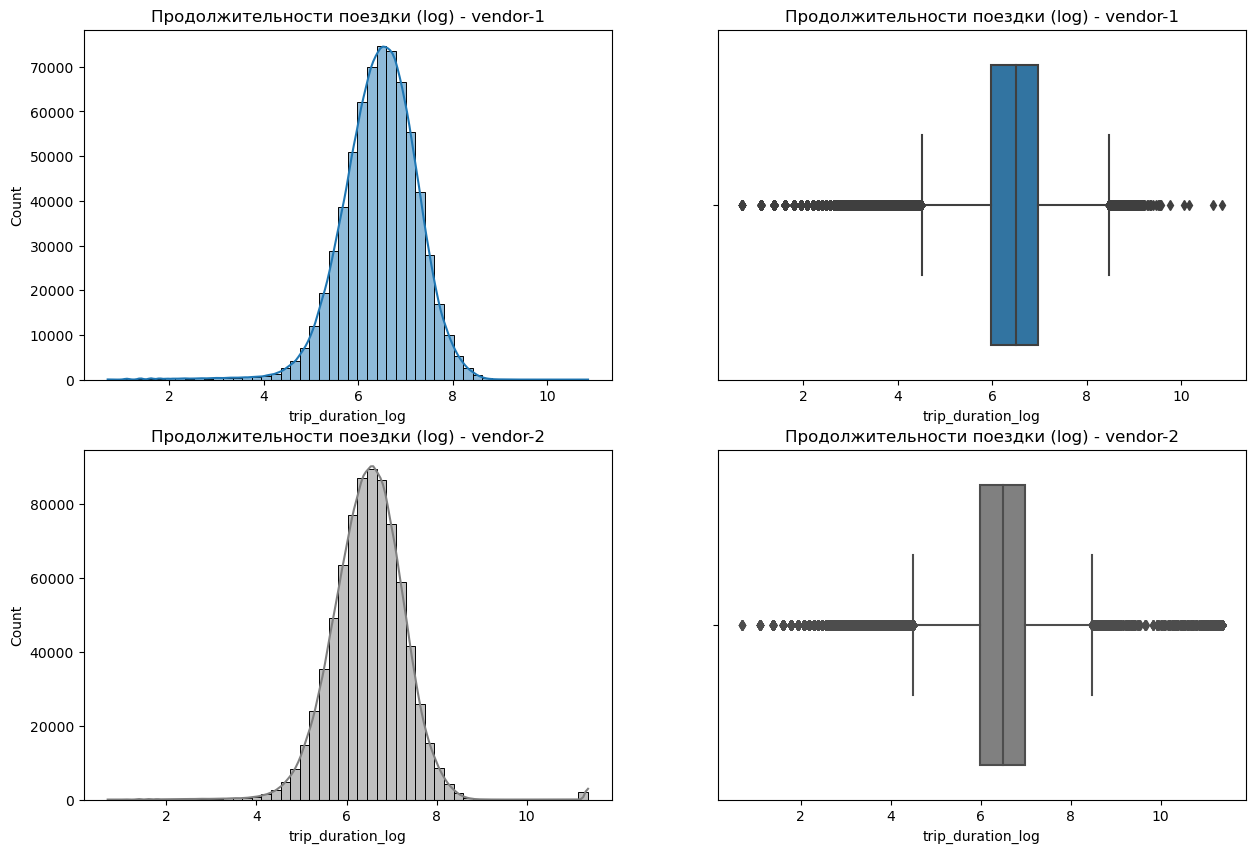

In [51]:
# строим гистограмму и коробчатую диаграмму для визуальной оценки
mask_vendorid_1 = taxi_cleen['vendor_id'] == 1
mask_vendorid_2 = taxi_cleen['vendor_id'] == 2

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
hisplot = sns.histplot(data=taxi_cleen[mask_vendorid_1], x='trip_duration_log', kde=True, bins=50, ax=axes[0][0]);
hisplot.set_title('Продолжительности поездки (log) - vendor-1');
boxplot = sns.boxplot(data=taxi_cleen[mask_vendorid_1], x='trip_duration_log', ax=axes[0][1]);
boxplot.set_title('Продолжительности поездки (log) - vendor-1');
hisplot = sns.histplot(data=taxi_cleen[mask_vendorid_2], x='trip_duration_log', kde=True, bins=50, color='grey', ax=axes[1][0]);
hisplot.set_title('Продолжительности поездки (log) - vendor-2');
boxplot = sns.boxplot(data=taxi_cleen[mask_vendorid_2], x='trip_duration_log', color='grey', ax=axes[1][1]);
boxplot.set_title('Продолжительности поездки (log) - vendor-2');

**Комментарий:**

1. Распределения в группах практически не отличаются, признак vendor_id не имеет значения при определении длительности поездки.

### Задание 3.3.

Построим график, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag). 

Сравните два распределения между собой.

<Axes: xlabel='store_and_fwd_flag', ylabel='count'>

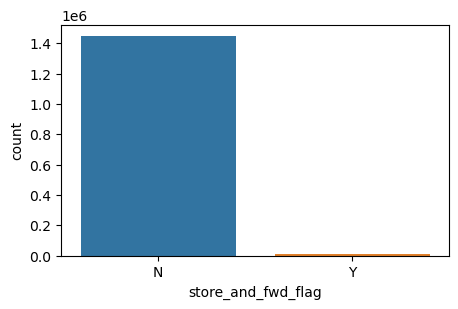

In [52]:
# построим диаграмму распределения данных между таксопарками
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))
sns.countplot(data=taxi_cleen, x='store_and_fwd_flag')

**Комментарии** - распределение данных между признаком "Отправка сообщения" несбалансированны.

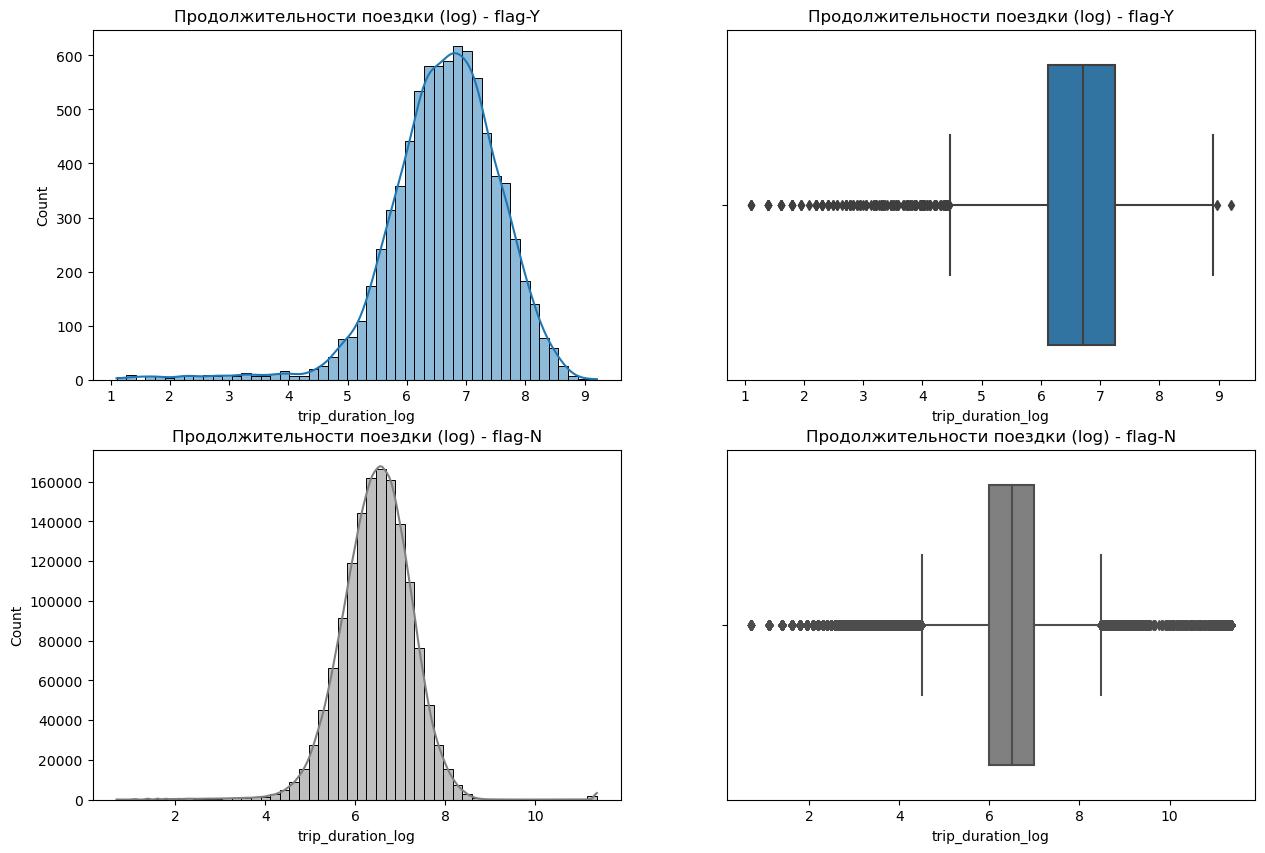

In [53]:
# строим гистограмму и коробчатую диаграмму для визуальной оценки
mask_flag_y = taxi_cleen['store_and_fwd_flag'] == 'Y'
mask_flag_n = taxi_cleen['store_and_fwd_flag'] == 'N'

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
hisplot = sns.histplot(data=taxi_cleen[mask_flag_y], x='trip_duration_log', kde=True, bins=50, ax=axes[0][0]);
hisplot.set_title('Продолжительности поездки (log) - flag-Y');
boxplot = sns.boxplot(data=taxi_cleen[mask_flag_y], x='trip_duration_log', ax=axes[0][1]);
boxplot.set_title('Продолжительности поездки (log) - flag-Y');
hisplot = sns.histplot(data=taxi_cleen[mask_flag_n], x='trip_duration_log', kde=True, bins=50, color='grey', ax=axes[1][0]);
hisplot.set_title('Продолжительности поездки (log) - flag-N');
boxplot = sns.boxplot(data=taxi_cleen[mask_flag_n], x='trip_duration_log', color='grey', ax=axes[1][1]);
boxplot.set_title('Продолжительности поездки (log) - flag-N');

**Комментарий:**

1. Распределения в группах значительно отличаются, признак store_and_fwd_flag имеет значение при определении длительности поездки;
2. Необходимо учесть, что данные не сбалансированы.

### Задание 3.4.

Построим два графика:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

Вопросы:

1. В какое время суток такси заказывают реже всего?
2. В какое время суток наблюдается пик медианной длительности поездок?

Text(0, 0.5, 'Количество - сек.')

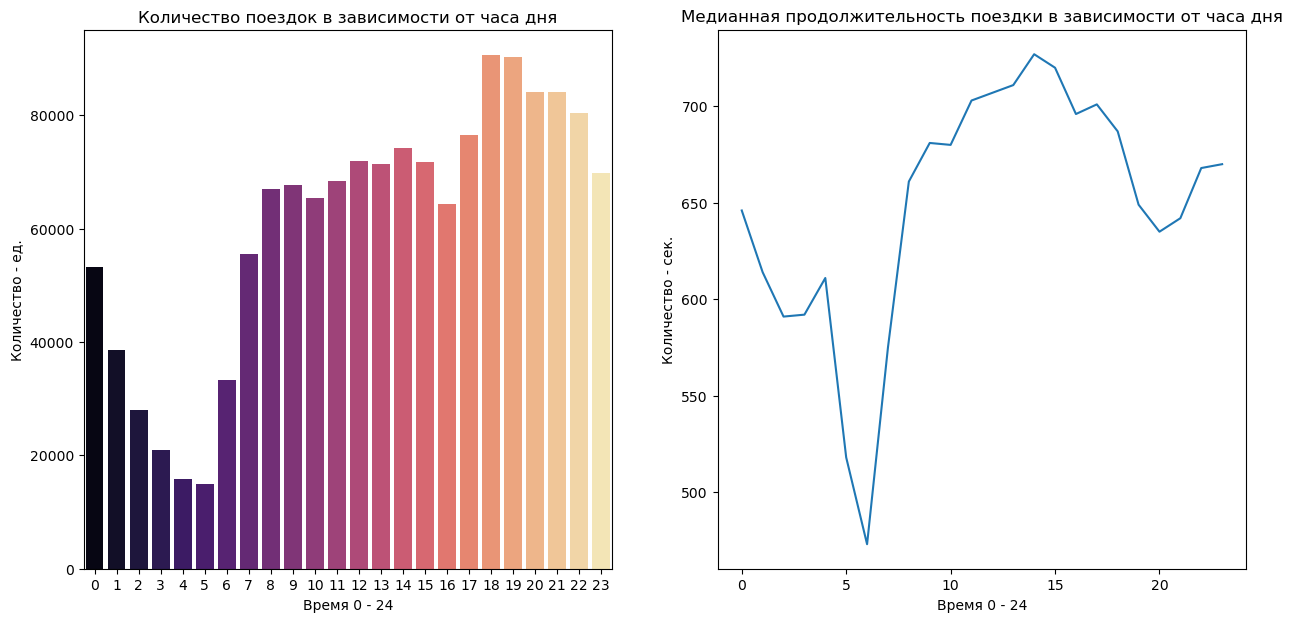

In [54]:
# строим столбчатую и линейную диаграмму для визуализации оценки 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
sns.countplot(data=taxi_cleen, x='pickup_hour', palette='magma', ax=axes[0])
axes[0].set_title('Количество поездок в зависимости от часа дня')
axes[0].set_xlabel('Время 0 - 24')
axes[0].set_ylabel('Количество - ед.')

median_trip_hours = taxi_cleen.groupby(('pickup_hour'))['trip_duration'].median()
sns.lineplot(data=median_trip_hours, ax=axes[1])
axes[1].set_title('Медианная продолжительность поездки в зависимости от часа дня')
axes[1].set_xlabel('Время 0 - 24')
axes[1].set_ylabel('Количество - сек.')

**Комментарии:**
1. Такси заказывают реже всего в интервале 4.00 - 5.00 часов ночи;
2. Пик медианной длительности поездок наблюдается в интервале 15.00.

### Задание 3.5.

Построим 2 графика:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

Вопросы:

1. В какой день недели совершается больше всего поездок?
2. В какой день недели медианная длительность поездок наименьшая?


Text(0, 0.5, 'Количество - сек.')

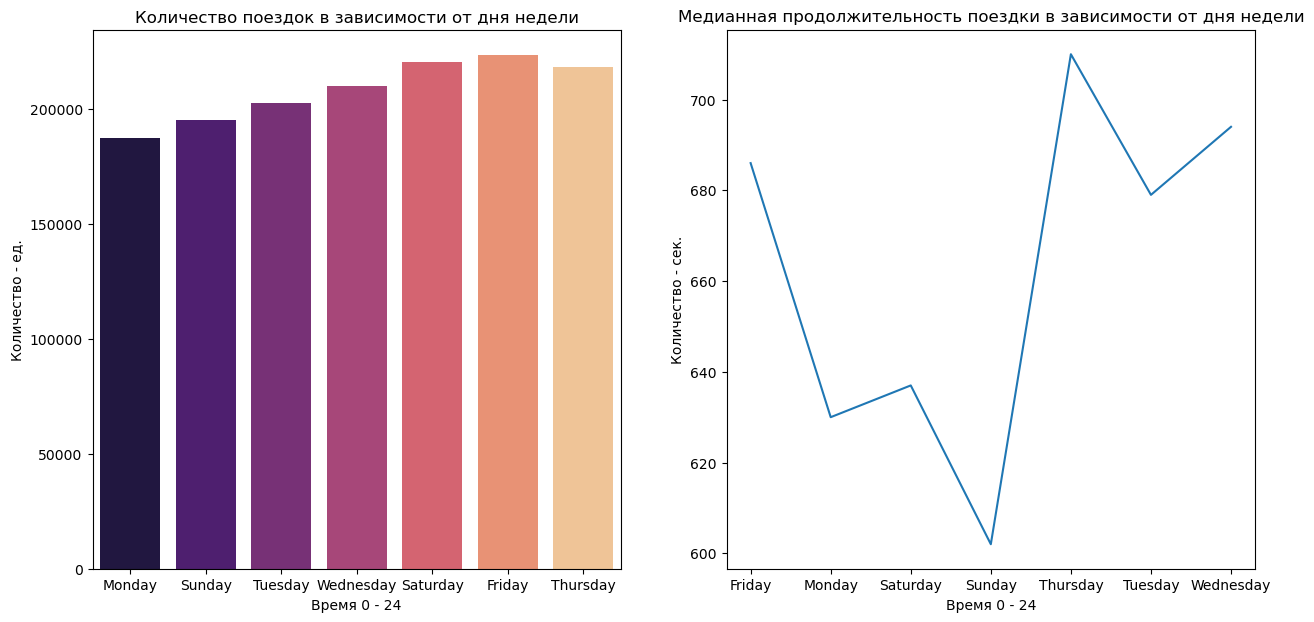

In [55]:
# строим столбчатую и линейную диаграмму для визуализации оценки 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
sns.countplot(data=taxi_cleen, x='pickup_dayofweek', palette='magma', ax=axes[0])
axes[0].set_title('Количество поездок в зависимости от дня недели')
axes[0].set_xlabel('Время 0 - 24')
axes[0].set_ylabel('Количество - ед.')

count_trip_hours = taxi_cleen.groupby(('pickup_dayofweek'))['trip_duration'].median()
sns.lineplot(data=count_trip_hours, ax=axes[1])
axes[1].set_title('Медианная продолжительность поездки в зависимости от дня недели')
axes[1].set_xlabel('Время 0 - 24')
axes[1].set_ylabel('Количество - сек.')# ваш код здесь

**Комментарии:**
1. Больше всего поездок совершается в Friday (пятница);
2. Медианная длительность поездок наименьшая в Sunday (воскресенье).

### Задание 3.6.
Посмотрим на обе временные характеристики одновременно. 

Построим сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration). 

Визуализируем полученную сводную таблицу с помощью тепловой карты.

Text(0.5, 25.722222222222214, 'Время суток')

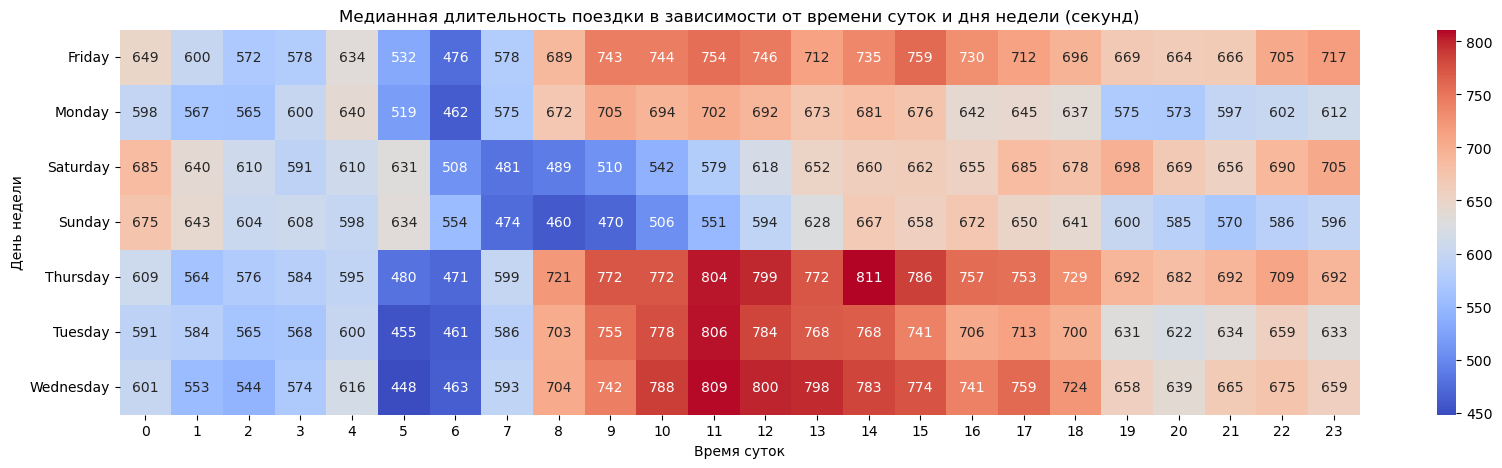

In [56]:
# формируем и выводим график
median_trip_duration_hour_dayofweek = taxi_cleen.pivot_table(values='trip_duration', index='pickup_dayofweek', columns='pickup_hour', aggfunc='median')

fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(data=median_trip_duration_hour_dayofweek, annot=True, fmt='.0f', cmap='coolwarm')
ax.set_title('Медианная длительность поездки в зависимости от времени суток и дня недели (секунд)')
ax.set_ylabel('День недели') 
ax.set_xlabel('Время суток')


**Комментарии:**
1. Самые продолжительные поездки (в медианном смысле) наблюдаются с понедельника по пятницу в промежутке с 8 до 18 часов;
2. Наибольшая медианная длительность поездки наблюдалась в четверг в 14 часов дня.

### Задание 3.7.

Построим две диаграммы рассеяния (scatter-диаграммы):
* первая должна иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude) 
* вторая должна географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложите широту (longitude), а по оси ординат - долготу (latitude). 
Включите в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавьте следующие ограничения на границы осей абсцисс и ординат:
 
city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавьте на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее. 

(-74.03, -73.75)

/Users/alexander.v.varlamov/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/alexander.v.varlamov/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


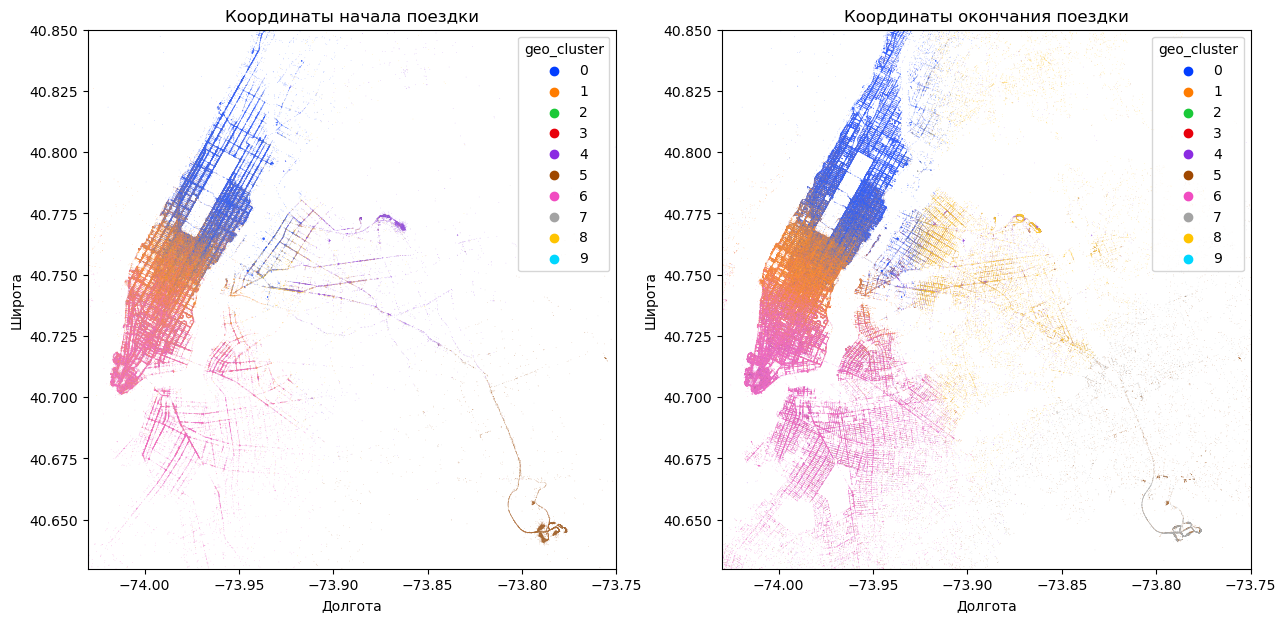

In [57]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

sns.scatterplot(data=taxi_cleen, x='pickup_longitude', y='pickup_latitude', hue='geo_cluster', palette='bright', s=0.2, alpha=.4, ax = axes[0])
axes[0].set_ylabel('Широта')
axes[0].set_xlabel('Долгота')
axes[0].set_title('Координаты начала поездки')
axes[0].set_ylim(city_lat_border)
axes[0].set_xlim(city_long_border)

sns.scatterplot(data=taxi_cleen, x='dropoff_longitude', y='dropoff_latitude', hue='geo_cluster', palette='bright', s=0.2, alpha=.4, ax = axes[1])
axes[1].set_ylabel('Широта')
axes[1].set_xlabel('Долгота')
axes[1].set_title('Координаты окончания поездки')
axes[1].set_ylim(city_lat_border)
axes[1].set_xlim(city_long_border)

In [58]:
# формируем код и выводим информацию о количестве кластеров которые вошли в границы Нью-Йорка
lat_min, lat_max, long_min, long_max = 40.63, 40.85, -74.03, -73.75
mask_1 = taxi_cleen['pickup_latitude'] >= lat_min
mask_2 = taxi_cleen['pickup_latitude'] <= lat_max
mask_3 = taxi_cleen['pickup_longitude'] >= long_min
mask_4 = taxi_cleen['pickup_longitude'] <= long_max
mask_5 = taxi_cleen['dropoff_latitude'] >= lat_min
mask_6 = taxi_cleen['dropoff_latitude'] <= lat_max
mask_7 = taxi_cleen['dropoff_longitude'] >= long_min
mask_8 = taxi_cleen['dropoff_longitude'] <= long_max

taxi_coordinat_pickup = taxi_cleen[mask_1 & mask_2 & mask_3 & mask_4]
pickup_clasters = taxi_coordinat_pickup['geo_cluster'].nunique()
print(f'Количество кластеров начала поездки в границах Ньюрка составляет - {pickup_clasters} ед.')
taxi_coordinat_dropoff = taxi_cleen[mask_5 & mask_6 & mask_7 & mask_8]
dropoff_clusters = taxi_coordinat_dropoff['geo_cluster'].nunique()
print(f'Количество кластеров окончания поездки в границах Нью-Йорка составляет - {dropoff_clusters} ед.')

Количество кластеров начала поездки в границах Ньюрка составляет - 8 ед.
Количество кластеров окончания поездки в границах Нью-Йорка составляет - 7 ед.


# 4. Отбор и преобразование признаков

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.


In [59]:
# выводим информацию о размере dataframe и наименование признаков
print('Размер преобразованного dataset: {}'.format(taxi_cleen.shape))
print('Признаки: {}'.format(taxi_cleen.columns))

Размер преобразованного dataset: (1458233, 27)
Признаки: Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_hour', 'pickup_dayofweek',
       'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction', 'geo_cluster',
       'temperature', 'visibility', 'wind speed', 'precip', 'events',
       'trip_duration_log'],
      dtype='object')


Для удобства работы сделаем копию исходной таблицы с поездками:

In [60]:
# делаем копию dataframe
train_data = taxi_cleen.copy()
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events,trip_duration_log
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,5.0,1.498521,99.970196,0,4.4,8.0,27.8,0.3,None,6.122493
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6.0,1.805507,-117.153768,6,28.9,16.1,7.4,0.0,None,6.498282
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,16.0,6.385098,-159.680165,6,-6.7,16.1,24.1,0.0,None,7.661527
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4.0,1.485498,-172.737700,6,7.2,16.1,25.9,0.0,None,6.063785
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,5.0,1.188588,179.473585,0,9.4,16.1,9.3,0.0,None,6.077642


### Задание 4.1.

Удалим неинформативные и избыточные признаки: 
1. "Id" - уникальный для каждой поездки и не несет полезной информации в определении ее продолжительности;
2. "dropoff_datetime" - призднак который обеспечивает утечку данных (data leak);
3. "pickup_datetime" - признак из которого мы извлекли информацию и он не несет ни какой информации или даже повторяет;
4. "pickup_date" - признак из которого мы извлекли информацию и он не несет ни какой информации или даже повторяет.

In [61]:
# удалим неинформативный признаки "id" и признак который создает утечку данных "dropoff_datetime"
train_data = train_data.drop(columns=['id', 'dropoff_datetime'], axis=1)
print(f'Размер dataframe составляет: {train_data.shape}')

Размер dataframe составляет: (1458233, 25)


Ранее мы извлекли всю необходимую для нас информацию из даты начала поездки, теперь мы можем избавиться от этих признаков, так как они нам больше не понадобятся:


In [62]:
# удалим признаки которые нам больше не понадобятся
drop_columns = ['pickup_datetime', 'pickup_date']
train_data = train_data.drop(drop_columns, axis=1)
print(f'Размер dataframe составляет: {train_data.shape}')

Размер dataframe составляет: (1458233, 23)


### Задание 4.2.

Закодируем признак vendor_id в таблице train_data таким образом, чтобы он был равен 0, если идентификатор таксопарка равен 1, и 1 — в противном случае.

Закодируем признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение 'N', и 1 — в противном случае.

Вопросы:
1. Рассчитайте среднее по закодированному столбцу vendor_id. Ответ приведите с точностью до сотых.
2. Рассчитайте среднее по закодированному столбцу store_and_fwd_flag. Ответ приведите с точностью до тысячных.



In [63]:
# произведем кодировку данных в признаке "vendor_id", "store_and_fwd_flag"
train_data['vendor_id'] = train_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
train_data['store_and_fwd_flag'] = train_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)


In [64]:
# выводим информацию согласно вопросов
mean_vendor_id = train_data['vendor_id'].mean()
mean_store_and_fwd_flag = train_data['store_and_fwd_flag'].mean()
print(f'Среднее значение в признаке "vender_id" после преобразования состовляет: {mean_vendor_id.round(2)}.')
print(f'Среднее значение в признаке "store_and_fwd_flag" после преобразования состовляет: {mean_store_and_fwd_flag.round(3)}.')

Среднее значение в признаке "vender_id" после преобразования состовляет: 0.53.
Среднее значение в признаке "store_and_fwd_flag" после преобразования состовляет: 0.006.


### Задание 4.3.

Создадим таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, geo_cluster и events в таблице train_data с помощью OneHotEncoder из библиотеки sklearn. Параметр drop выставим в значение 'first', чтобы удалять первый бинарный столбец, тем самым не создавая излишних признаков.

Вопрос:

1. Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?


In [65]:
# проведем кодирование признаков с помощью однократного горячего кодирования
columns_to_change = ['pickup_dayofweek', 'geo_cluster', 'events']
one_hot_encoder = OneHotEncoder(drop='first')

data_onehot = one_hot_encoder.fit_transform(train_data[columns_to_change]).toarray()
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
print(f'Количество сгенерированных бинарных признаков: {data_onehot.shape[1]}')

Количество сгенерированных бинарных признаков: 18


Добавим полученную таблицу с закодированными признаками:

In [66]:
train_data = pd.concat([train_data.reset_index(drop=True).drop(columns_to_change, axis=1), data_onehot], axis=1)
print(f'Размер dataframe после кодировки категориальных данных состовляет: {train_data.shape}.')

Размер dataframe после кодировки категориальных данных состовляет: (1458233, 38).


Cформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака trip_duration и его логарифмированной версии trip_duration_log:


In [67]:
# создаем матрицу наблюдений и вектор правильных ответов
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

***Ограничение: все модели мы будем обучать на логарифмированной версии y_log.***

In [68]:
# производим разделение выборки на тренировочную и валидационную, выбранный тип валидации - hold-out, соотношении 67/33
X_train, X_valid, y_train_log, y_valid_log = train_test_split(X, y_log, test_size=0.33, random_state=RANDOM_SEED)

### Задание 4.4.

С помощью SelectKBest отберем 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуем по тренировочной выборке, используя параметр **score_func = f_regression**.

Вопрос:

1. Укажите признаки, которые вошли в список отобранных.


In [69]:
# производим отбор признаков
selector = SelectKBest(score_func=f_regression, k=25)
selector.fit(X_train, y_train_log)
best_features = selector.get_feature_names_out()
X_train = X_train[best_features]
X_valid = X_valid[best_features]
print(best_features)

['vendor_id' 'passenger_count' 'pickup_longitude' 'pickup_latitude'
 'dropoff_longitude' 'dropoff_latitude' 'store_and_fwd_flag' 'pickup_hour'
 'pickup_holiday' 'total_distance' 'total_travel_time' 'number_of_steps'
 'haversine_distance' 'temperature' 'pickup_dayofweek_Monday'
 'pickup_dayofweek_Saturday' 'pickup_dayofweek_Sunday'
 'pickup_dayofweek_Thursday' 'pickup_dayofweek_Tuesday'
 'pickup_dayofweek_Wednesday' 'geo_cluster_1' 'geo_cluster_4'
 'geo_cluster_5' 'geo_cluster_7' 'geo_cluster_8']


### Задание 4.5.

Нормализуем предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn (NB!! обучение нормализатора производится на обучающей выборке, а трансформация на обучающей и валидационной).

Вопрос:

1. Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки. Ответ округлите до сотых.


In [70]:
# производим нормализацию обучающей и валидной выборки с помощью MinMaxScaller
mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)
X_train_scaled = mm_scaler.transform(X_train)
X_valid_scaled = mm_scaler.transform(X_valid)

# выводим информацию согласно запроса
meam_ferst_predict = X_valid_scaled[:,0].mean().round(2)
print(f'Среднее арифметическое для первого предиктора (т.е. для первого столбца матрицы) из валидной вывборки составляет: {meam_ferst_predict}.')


Среднее арифметическое для первого предиктора (т.е. для первого столбца матрицы) из валидной вывборки составляет: 0.54.


# 5. Решение задачи регрессии: линейная регрессия и деревья решений

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:
$$z_i=log(y_i+1),$$
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$ 



### Задание 5.1.

Построим модель линейной регрессии на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

Вопрос:
1. Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [71]:
# строим модель LinearRegression
model_LinerReg = LinearRegression()
model_LinerReg.fit(X_train_scaled, y_train_log)
y_train_log_predict = model_LinerReg.predict(X_train_scaled)
y_valid_log_predict = model_LinerReg.predict(X_valid_scaled)
print('RMSLE на тренировочной выборке составляет: {:.2f}'.format(np.sqrt(mean_squared_error(y_train_log, y_train_log_predict))))
print('RMSLE на валидационной выборке составляет: {:.2f}'.format(np.sqrt(mean_squared_error(y_valid_log, y_valid_log_predict))))

RMSLE на тренировочной выборке составляет: 0.53
RMSLE на валидационной выборке составляет: 0.54


### Задание 5.2.

Построим модель линейной регрессии с генерацией полиномиальных признаков. Полиномиальные признаки 2-ой степени сгенерируем с помощью PolynomialFeatures из библиотеки sklearn (параметр include_bias выставите в значение False).

Вопросы:

1. Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.
2. Наблюдаются ли у вашей модели признаки переобучения?


In [72]:
# генерируем полиномиальные признаки и обучаем повторно модель LinearRegression
model_PolinomFeat = PolynomialFeatures(2, include_bias=False)
X_train_scaled_poli = model_PolinomFeat.fit_transform(X_train_scaled)
X_valid_scaled_poli = model_PolinomFeat.fit_transform(X_valid_scaled)

model_LinerReg_poli = LinearRegression()
model_LinerReg_poli.fit(X_train_scaled_poli, y_train_log)
y_train_log_poli_predict = model_LinerReg_poli.predict(X_train_scaled_poli)
y_valid_log_poli_predict = model_LinerReg_poli.predict(X_valid_scaled_poli)
print('RMSLE на тренировочной выборке составляет: {:.2f}'.format(np.sqrt(mean_squared_error(y_train_log, y_train_log_poli_predict))))
print('RMSLE на валидационной выборке составляет: {:.2f}'.format(np.sqrt(mean_squared_error(y_valid_log, y_valid_log_poli_predict))))


RMSLE на тренировочной выборке составляет: 0.47
RMSLE на валидационной выборке составляет: 0.61


**Комментарии:**
1. На модели наблюдается переобучение - метрика на тренировочной выборке сильно отличается чем на валидационной, а так же ухудшение по сравнению с моделью Linearregression.

### Задание 5.3.

Построим модель полиномиальной регрессии 2-ой степени с L2-регуляризацией (регуляризация по Тихонову) на обучающей выборке  (факторы нормализованы, целевую переменную используйте в логарифмическом масштабе). Коэффициент регуляризации $\alpha$ равный 1, остальные параметрыпо умолчанию.

Вопросы:

1. Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

In [73]:
# строим модель с L2 - регуляризацией (регуляризация по Тихонову) на полиномиальных признаках - Ridge
model_Ridge = Ridge(alpha=1)
model_Ridge.fit(X_train_scaled_poli, y_train_log)
y_train_log_poli_predict_ridge = model_Ridge.predict(X_train_scaled_poli)
y_valid_log_poli_predict_ridge = model_Ridge.predict(X_valid_scaled_poli)
print('RMSLE на тренировочной выборке составляет: {:.2f}'.format(np.sqrt(mean_squared_error(y_train_log, y_train_log_poli_predict_ridge))))
print('RMSLE на валидационной выборке составляет: {:.2f}'.format(np.sqrt(mean_squared_error(y_valid_log, y_valid_log_poli_predict_ridge))))

RMSLE на тренировочной выборке составляет: 0.48
RMSLE на валидационной выборке составляет: 0.48


### Задание 5.4.

Построим модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы нормализованы, целевая переменную в логарифмическом масштабе). Все параметры по умолчанию. 

Вопросы:

1. Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.
2. Наблюдаются ли у вашей модели признаки переобучения?


In [74]:
# строим модель DecisionTreeRegressor
model_DTR = DecisionTreeRegressor(random_state=RANDOM_SEED)
model_DTR.fit(X_train_scaled, y_train_log)
y_train_log_predict_dtr = model_DTR.predict(X_train_scaled)
y_valid_log_predict_dtr = model_DTR.predict(X_valid_scaled)
print('RMSLE на тренировочной выборке составляет: {:.2f}'.format(np.sqrt(mean_squared_error(y_train_log, y_train_log_predict_dtr))))
print('RMSLE на валидационной выборке составляет: {:.2f}'.format(np.sqrt(mean_squared_error(y_valid_log, y_valid_log_predict_dtr))))

RMSLE на тренировочной выборке составляет: 0.00
RMSLE на валидационной выборке составляет: 0.56


**Комментарии:**
1. На модели наблюдается переобучение - метрика на тренировочной выборке сильно отличается от метрики на валидационной.

### Задание 5.5.

Переберем все возможные варианты глубины дерева решений в диапазоне от 7 до 20: max_depths = range(7, 20). Параметр random_state задайте равным 42.
Построим линейные графики изменения метрики RMSE на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений. 

Вопросы:

1. Найдите оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом еще не будет наблюдаться переобучение (валидационная кривая еще не начинает возрастать).
2. Чему равно значение метрик RMSLE на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной? Ответ округлите до сотых.

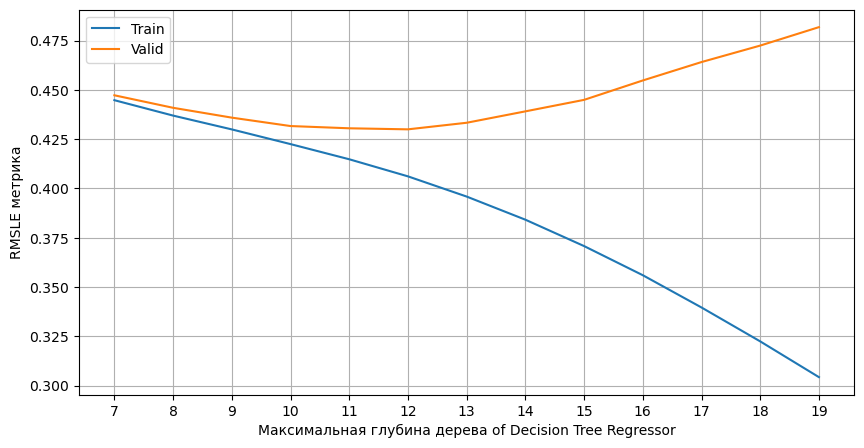

In [75]:
# формируем и выводим информацию о значении метрик в модели DecisionTreeRegression в зависимости от параметра max_depths (максимальная глубина дерева)
max_depths = range(7, 20)
train_scores = []
valid_scores = []
for max_depth in max_depths:
    model_DTR = DecisionTreeRegressor(max_depth=max_depth)
    model_DTR.fit(X_train_scaled, y_train_log)
    y_train_log_pred = model_DTR.predict(X_train_scaled)
    y_valid_log_pred = model_DTR.predict(X_valid_scaled)
    train_scores.append(np.sqrt(mean_squared_error(y_train_log, y_train_log_pred)))
    valid_scores.append(np.sqrt(mean_squared_error(y_valid_log, y_valid_log_pred)))
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=max_depths, y=train_scores, label='Train')
sns.lineplot(x=max_depths, y=valid_scores, label='Valid')
ax.set_xlabel('Максимальная глубина дерева of Decision Tree Regressor')
ax.set_ylabel('RMSLE метрика')
ax.set_xticks(max_depths)
ax.grid()

**Комментарии:**

1. Согласно графика оптимальное значение параметра max_depths составляет - 12. 

In [76]:
# строим модель DecisionTreeRegressor с учетом оптимального значения гиперпараметра math_depth=12
model_DTR = DecisionTreeRegressor(max_depth=12, random_state=RANDOM_SEED)
model_DTR.fit(X_train_scaled, y_train_log)
y_train_log_predict_dtr = model_DTR.predict(X_train_scaled)
y_valid_log_predict_dtr = model_DTR.predict(X_valid_scaled)
print('RMSLE на тренировочной выборке составляет: {:.2f}'.format(np.sqrt(mean_squared_error(y_train_log, y_train_log_predict_dtr))))
print('RMSLE на валидационной выборке составляет: {:.2f}'.format(np.sqrt(mean_squared_error(y_valid_log, y_valid_log_predict_dtr))))

RMSLE на тренировочной выборке составляет: 0.41
RMSLE на валидационной выборке составляет: 0.43


### Подбор гиперпараметров для модели DecisionTreeRegression c помощью алгоритма GridSearchCV (очень долго по времени)

```
# формируем сетку гиперпараметров
param_grid ={'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
            'splitter': ['best', 'random'],
            'min_samples_split': range(1, 3),
            'max_depth': range(2, 20), # максимальная глубина деревьев
            'min_samples_leaf': range(1, 5), # максимальное количество листьев
            'max_features': ['auto', 'sqrt', 'log2']
            }
# cоздаем объект класса GridSearchCV                 
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=RANDOM_SEED),
    param_grid=param_grid, 
    cv=5,
    return_train_score=True, 
    n_jobs = -1
) 
# обучаем модель  
%time grid_search.fit(X_train_scaled, y_train_log) 
# формируем предсказания целевой переменной
y_train_pred_gcv = grid_search.predict(X_train_scaled)
y_test_pred_gcv = grid_search.predict(X_valid_scaled)
#print('MSE на тренировочном наборе: {:.2f}'.format(mean_squared_error(y_train_log, y_train_pred_gcv)))
#print('MSE на тестовом наборе: {:.5f}'.format(mean_squared_error(y_valid_log, y_test_pred_gcv)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))
```

```
# строим модель DecisionTreeRegressor с учетом подобранных гиперпараметров
model_DTR = DecisionTreeRegressor(max_depth= 12, min_samples_leaf=4, min_samples_split=, criterion=, splitter=, max_features=, random_state=RANDOM_SEED)
model_DTR.fit(X_train_scaled, y_train_log)
y_train_log_predict_dtr = model_DTR.predict(X_train_scaled)
y_valid_log_predict_dtr = model_DTR.predict(X_valid_scaled)
print('RMSLE на тренировочной выборке составляет: {:.2f}'.format(np.sqrt(mean_squared_error(y_train_log, y_train_log_predict_dtr))))
print('RMSLE на валидационной выборке составляет: {:.2f}'.format(np.sqrt(mean_squared_error(y_valid_log, y_valid_log_predict_dtr))))
```

# 6. Решение задачи регрессии: ансамблевые методы и построение прогноза

### Задание 6.1.

Построим модель случайного леса на обучающей выборке (факторы нормализованы, целевую переменную используйте в логарифмическом масштабе). Показатели гиперпараметров принимаем:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Вопросы:

1. Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

In [77]:
# строим модель RandomForestRegressor
model_RFR = RandomForestRegressor(n_estimators=200, max_depth= 12, criterion='squared_error', min_samples_split=20, random_state=RANDOM_SEED)
model_RFR.fit(X_train_scaled, y_train_log)
y_train_log_predict_rfr = model_RFR.predict(X_train_scaled)
y_valid_log_predict_rfr = model_RFR.predict(X_valid_scaled)
print('RMSLE на тренировочной выборке составляет: {:.2f}'.format(np.sqrt(mean_squared_error(y_train_log, y_train_log_predict_rfr))))
print('RMSLE на валидационной выборке составляет: {:.2f}'.format(np.sqrt(mean_squared_error(y_valid_log, y_valid_log_predict_rfr))))

RMSLE на тренировочной выборке составляет: 0.40
RMSLE на валидационной выборке составляет: 0.41


### Задание 6.2.
Построим модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке (факторы нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6, 
* min_samples_split=30,
* random_state=42

Вопросы:

1. Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [78]:
# строим модель GradientBoostingRegressor
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

X_train, X_valid, y_train_log, y_valid_log = train_test_split(X, y_log, test_size=0.33, random_state=RANDOM_SEED)

selector = SelectKBest(score_func=f_regression, k=25)
selector.fit(X_train, y_train_log)
best_features = selector.get_feature_names_out()
X_train = X_train[best_features]
X_valid = X_valid[best_features]

mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)
X_train_scaled = mm_scaler.transform(X_train)
X_valid_scaled = mm_scaler.transform(X_valid)

model_GBR = GradientBoostingRegressor(learning_rate=0.5, n_estimators=100, max_depth= 6,  min_samples_split=30, random_state=RANDOM_SEED)
model_GBR.fit(X_train_scaled, y_train_log)
y_train_log_predict_gbr = model_GBR.predict(X_train_scaled)
y_valid_log_predict_gbr = model_GBR.predict(X_valid_scaled)
print('RMSLE на тренировочной выборке составляет: {:.2f}'.format(np.sqrt(mean_squared_error(y_train_log, y_train_log_predict_gbr))))
print('RMSLE на валидационной выборке составляет: {:.2f}'.format(np.sqrt(mean_squared_error(y_valid_log, y_valid_log_predict_gbr))))
print()
# Для лучшей из построенных моделей рассчитайте медианную абсолютную ошибку предсказания длительности поездки такси на валидационной выборке.
# Значение метрики MeAE переведите в минуты и округлите до десятых.
y_train = np.exp(y_train_log) - 1
y_valid = np.exp(y_valid_log) - 1
y_train_predict_gbr = np.exp(model_GBR.predict(X_train_scaled)) - 1
y_valid_predict_gbr = np.exp(model_GBR.predict(X_valid_scaled)) - 1
print('MedianAE на тренировочной выборке составляет {:.1f} минут.'.format(median_absolute_error(y_train, y_train_predict_gbr)/60))
print('MedianAE на валидационной выборке составляет {:.1f} минут.'.format(median_absolute_error(y_valid, y_valid_predict_gbr)/60))

RMSLE на тренировочной выборке составляет: 0.37
RMSLE на валидационной выборке составляет: 0.39

MedianAE на тренировочной выборке составляет 1.8 минут.
MedianAE на валидационной выборке составляет 1.8 минут.


### Задание 6.3.

Выведем сводную информацию о значении целевой метрики на разных моделях.

Вопросы:

1. Какая из построенных вами моделей показала наилучший результат (наименьшее значение RMSLE на валидационной выборке)?
* Линейная регрессия,
* Полиномиальная регрессия 2ой степени,
* Дерево решений,
* Случайный лес,
* Градиентный бустинг над деревьями решений,
* Экстремальный градиентный бустинг.

In [79]:
# формируем код и выводим сводный DataFrame c полученными результатами 
resalts = {'Model': ['LinReg', 'LinReg+Poli', 'Ridge', 'DecTreeReg', 'DecTreeReg_macro', 'RandForestReg', 'GradBoostReg', 'XGBoost'], 
           'RMSLE_train':[0.53, 0.47, 0.48, 0.00, 0.41, 0.40, 0.37, 0.36452], 
           'RMSLE_valid':[0.54, 0.61, 0.48, 0.56, 0.43, 0.41, 0.39, 0.38731]
           }
resalts_df = pd.DataFrame(resalts)
display(resalts_df)

,Model,RMSLE_train,RMSLE_valid
0,LinReg,0.53000,0.54000
1,LinReg+Poli,0.47000,0.61000
2,Ridge,0.48000,0.48000
3,DecTreeReg,0.00000,0.56000
4,DecTreeReg_macro,0.41000,0.43000
5,RandForestReg,0.40000,0.41000
6,GradBoostReg,0.37000,0.39000
7,XGBoost,0.36452,0.38731


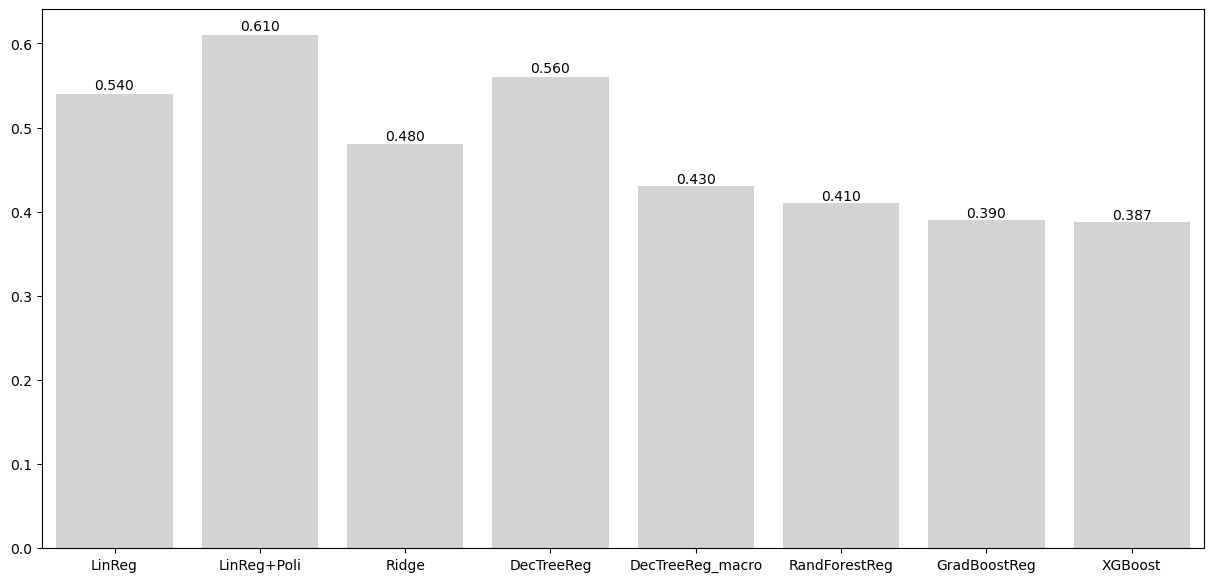

In [80]:
# опишем функцию для вывода значений на график seaborn
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.3f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.3f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

# выводим сводную информацию о достигнутых показателях метрики в разрезе моделей
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))
p = sns.barplot(data=resalts, x='Model', y='RMSLE_valid', color='lightgrey')
show_values(p)

### Задание 6.4.

Построим столбчатую диаграмму коэффициентов значимости каждого из факторов для наилучшей модели - "Градиентного бустинга над деревьями решений".

Вопросы:

1. Укажите топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе - факторов.


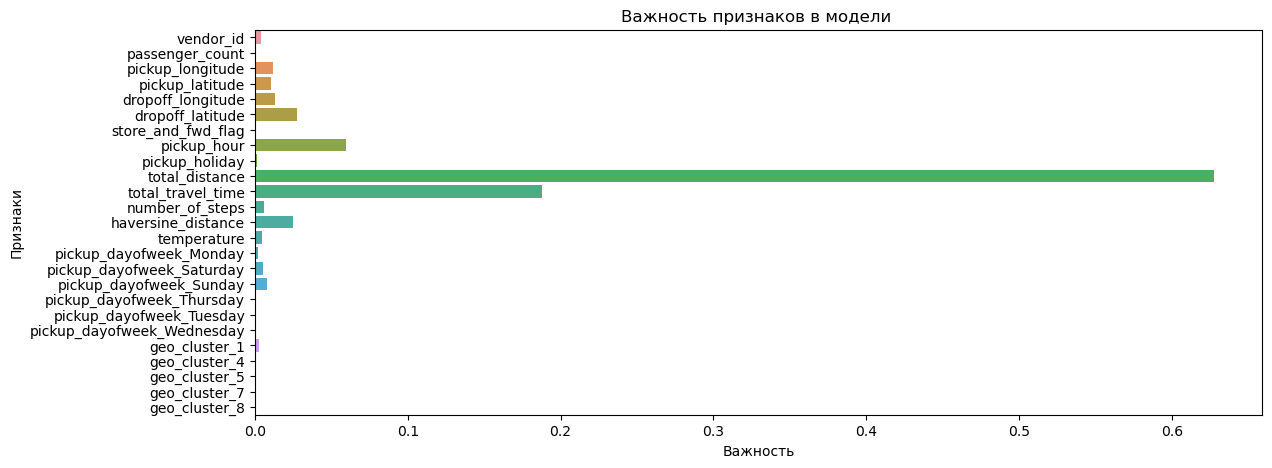

In [81]:
# формируем и выводим график значимости признаков для модели Градиентного бустинга над деревьями решений
fig, ax = plt.subplots(figsize=(13, 5))
feature = X.columns
feature_importances = model_GBR.feature_importances_
sns.barplot(y=best_features, x=feature_importances, orient='h', ax=ax);
ax.set_title('Важность признаков в модели ')
ax.set_ylabel('Признаки')
ax.set_xlabel('Важность');

### Задание 6.5.

Несмотря на все преимущества, у метрики **RMSLE** есть один недостаток — она не является интерпретируемой. Нам хотелось бы понять, насколько наша итоговая модель хорошо предсказывает целевой признак с точки зрения бизнес-процесса. Точнее, мы бы хотели получить более понятное представление об ошибке прогноза длительности поездки.

Для лучшей из построенных моделей рассчитываем медианную абсолютную ошибку (MeAE - в sklearn функция median_absolute_error) предсказания длительности поездки такси на валидационной выборке:
$$ MeAE = median(|y_i-\hat{y_i}|)$$

Значение метрики MeAE переведем в минуты и округлите до десятых.


In [82]:
# выводим информацию о метрике MedianAE для модели Градиентного бустинга над деревьями решений
y_valid = np.exp(y_valid_log) - 1
y_valid_pred = np.exp(model_GBR.predict(X_valid_scaled)) - 1
# Для лучшей из построенных моделей рассчитайте медианную абсолютную ошибку предсказания длительности поездки такси на валидационной выборке.
# Значение метрики MeAE переведите в минуты и округлите до десятых.
print('MAE на валидной выборке составляет {:.1f} минут.'.format(median_absolute_error(y_valid_pred, y_valid)/60))

MAE на валидной выборке составляет 1.8 минут.


# 7. Предсказание для отложенного тестового набора данных (сделать submit). 

Прочитаем тестовые данные и заранее выделим столбец с идентификаторами поездок из тестового набора данных. Он нам еще пригодится:

In [83]:
# загружаем тестовые данные для формирования прогноза
test_data = pd.read_csv("data/Project5_test_data.csv")
osrm_data_test = pd.read_csv("data/Project5_osrm_data_test.csv")
test_id = test_data['id']

Перед созданием прогноза для тестовой выборки необходимо произвести все манипуляции с данными, которые мы производили с тренировочной выборкой, а именно:
* Перевести признак pickup_datetime в формат datetime;
* Добавить новые признаки (временные, географические, погодные и другие факторы);
* Произвести очистку данных от пропусков;
* Произвести кодировку категориальных признаков:
    * Закодировать бинарные признаки;
    * Закодировать номинальные признаки с помощью обученного на тренировочной выборке OneHotEncoder’а;
* Сформировать матрицу наблюдений, оставив в таблице только те признаки, которые были отобраны с помощью SelectKBest;
* Нормализовать данные с помощью обученного на тренировочной выборке MinMaxScaler’а.

In [84]:
# производим подготовку тестового dataframe 
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
test_data = add_datetime_features(test_data)
test_data = add_holiday_features(test_data, holiday)
test_data = add_osrm_features(test_data, osrm_data_test)
test_data = add_geographical_features(test_data)
test_data = add_cluster_features(test_data)
test_data = add_weather_features(test_data, weather)
test_data = fill_null_weather_data(test_data)

test_data['vendor_id'] = test_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)

test_data_onehot = one_hot_encoder.fit_transform(test_data[columns_to_change]).toarray()
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
test_data_onehot = pd.DataFrame(test_data_onehot, columns=column_names)

test_data = pd.concat(
    [test_data.reset_index(drop=True).drop(columns_to_change, axis=1), test_data_onehot], 
    axis=1
)

X_test = test_data[best_features]

scaller = MinMaxScaler()
scaller.fit(X_test)
X_test_scaled = scaller.transform(X_test)

model_PolinomFeat = PolynomialFeatures(2, include_bias=False)
X_test_scaled_poli = model_PolinomFeat.fit_transform(X_test_scaled)

print('Размер X_test: {}'.format(X_test.shape))
print('Размер X_test_scаled: {}'.format(X_test_scaled.shape))
print('Размер X_test_scaled_poli: {}'.format(X_test_scaled_poli.shape))

/Users/alexander.v.varlamov/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/8c/t4hdh9954tg2trks19jq1b8m0000gn/T/ipykernel_54684/4110003208.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2[feature_2] = pd.to_datetime(data_2[feature_2], format='%Y-%m-%d')


Размер X_test: (625134, 25)
Размер X_test_scаled: (625134, 25)
Размер X_test_scaled_poli: (625134, 350)


### Формируем предсказания для тестовой выборке для разных моделей

In [85]:
# Делаем предсказание на тестовом наборе данных на основании LinearRegression
y_test_predict_lr = np.exp(model_LinerReg.predict(X_test_scaled)) - 1
# ваш код здесь
submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict_lr})
submission.to_csv('data/submission_lr_new.csv', index=False)

In [86]:
# Делаем предсказание на тестовом наборе данных на основании Ridge
y_test_predict_ridge = np.exp(model_Ridge.predict(X_test_scaled_poli)) - 1
# ваш код здесь
submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict_ridge})
submission.to_csv('data/submission_ridge_new.csv', index=False)

In [87]:
# Делаем предсказание на тестовом наборе данных на основании DecisionTreeRegression
y_test_predict_dtr = np.exp(model_DTR.predict(X_test_scaled)) - 1
# ваш код здесь
submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict_dtr})
submission.to_csv('data/submission_dtr_new.csv', index=False)

In [88]:
# Делаем предсказание на тестовом наборе данных на основании RandomForestRegression
y_test_predict_rfr = np.exp(model_RFR.predict(X_test_scaled)) - 1
# ваш код здесь
submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict_rfr})
submission.to_csv('data/submission_rfr_new.csv', index=False)

In [89]:
# Делаем предсказание на тестовом наборе данных на основании RandomForestRegression
y_test_predict_gbr = np.exp(model_GBR.predict(X_test_scaled)) - 1
# ваш код здесь
submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict_gbr})
submission.to_csv('data/submission_gbr_new.csv', index=False)

### Формируем сводную информацию по метрике с учетом тестовой выборки после загрузки на Kaggle

In [90]:
# формируем код и выводим сводный DataFrame c полученными результатами 
final_resalts = {'Model': ['LinReg', 'LinReg+Poli', 'Ridge', 'DecTreeReg', 'DecTreeReg_macro', 'RandForestReg', 'GradBoostReg', 'XGBoost'], 
           'RMSLE_train':[0.53, 0.47, 0.48, 0.00, 0.41, 0.40, 0.37, 0.36452], 
           'RMSLE_valid':[0.54, 0.61, 0.48, 0.56, 0.43, 0.41, 0.39, 0.38731],
           'RMSLE_test':[1.80176, 0, 2.81747, 0, 0.99748, 0.64398, 1.29763, 0.78223]
           }
final_resalts_df = pd.DataFrame(final_resalts)
display(final_resalts_df)

,Model,RMSLE_train,RMSLE_valid,RMSLE_test
0,LinReg,0.53000,0.54000,1.80176
1,LinReg+Poli,0.47000,0.61000,0.00000
2,Ridge,0.48000,0.48000,2.81747
3,DecTreeReg,0.00000,0.56000,0.00000
4,DecTreeReg_macro,0.41000,0.43000,0.99748
5,RandForestReg,0.40000,0.41000,0.64398
6,GradBoostReg,0.37000,0.39000,1.29763
7,XGBoost,0.36452,0.38731,0.78223


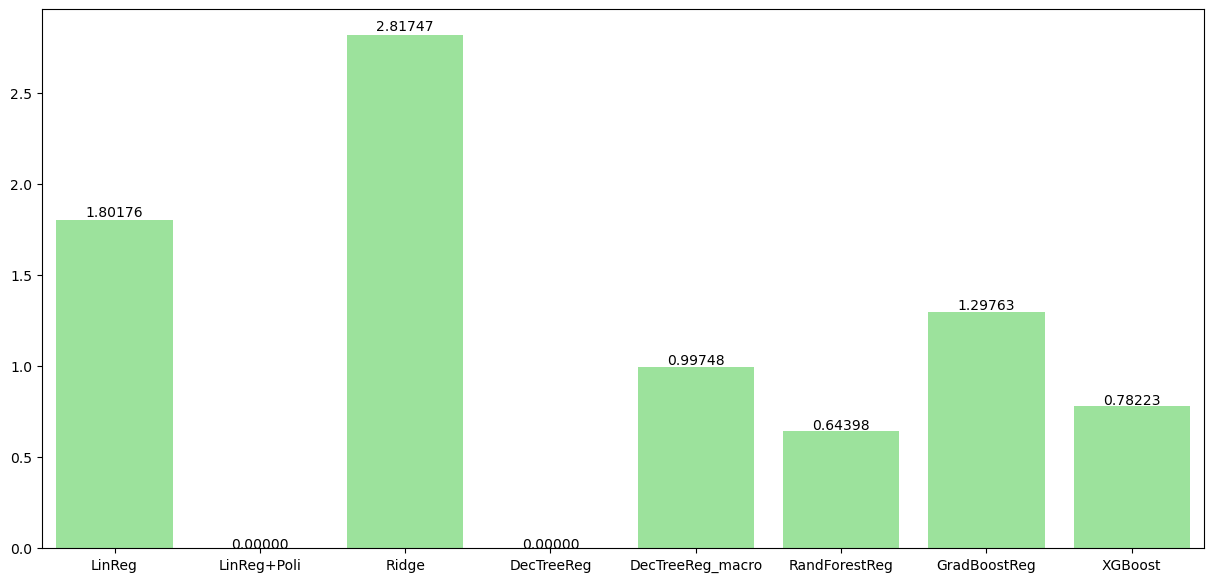

In [91]:
# опишем функцию для вывода значений на график seaborn
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.5f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.5}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

# выводим сводную информацию о достигнутых показателях метрики в разрезе моделей
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))
p = sns.barplot(data=final_resalts, x='Model', y='RMSLE_test', color='lightgreen')
show_values(p)

#### Наилучший результат на тестовой выборке показала модель RandomForestRegression: Public Score = 0.64398

# 8. Бонус

В завершение по ансамблевым алгоритмам попробуем улучшить свое предсказание, воспользовавшись моделью экстремального градиентного бустинга (XGBoost) из библиотеки xgboost.

**XGBoost** - современная модель машинного обучения, которая является продолжением идеи градиентного бустинга Фридмана. У нее есть несколько преимуществ по сравнению с классической моделью градиентного бустинга из библиотеки sklearn: повышенная производительность путем параллелизации процесса обучения, повышенное качество решения за счет усовершенствования алгоритма бустинга, меньшая склонность к переобучению и широкий функционал возможности управления параметрами модели.

*Установка библиотеки:*
* !pip install xgboost

Перед обучением модели необходимо перевести наборы данных в тип данных xgboost.DMatrix:

In [92]:
# Создание матриц наблюдений в формате DMatrix
dtrain = xgb.DMatrix(X_train_scaled, label=y_train_log, feature_names=best_features)
dvalid = xgb.DMatrix(X_valid_scaled, label=y_valid_log, feature_names=best_features)
dtest = xgb.DMatrix(X_test_scaled, feature_names=best_features)

Обучение модели XGBoost происходит с помощью метода train, в который необходимо передать параметры модели, набор данных, количество базовых моделей в ансамбле, а также дополнительные параметры:

In [93]:
# Гиперпараметры модели
xgb_pars = {'min_child_weight': 20, 
            'eta': 0.1, 
            'colsample_bytree': 0.9, 
            'max_depth': 6, 
            'subsample': 0.9, 
            'lambda': 1, 
            'nthread': -1, 
            'booster' : 'gbtree', 
            'eval_metric': 'rmse', 
            'objective': 'reg:squarederror'
           }
# Тренировочная и валидационная выборка
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# Обучаем модель XGBoost
model_xgb = xgb.train(
    params=xgb_pars, #гиперпараметры модели
    dtrain=dtrain, #обучающая выборка
    num_boost_round=1000, #количество моделей в ансамбле
    evals=watchlist, #выборки, на которых считается матрица
    early_stopping_rounds=20, #раняя остановка
    maximize=False, #смена поиска максимума на минимум
    verbose_eval=100 #шаг, через который происходит отображение метрик
)

[0]	train-rmse:5.42218	valid-rmse:5.42190
[100]	train-rmse:0.39596	valid-rmse:0.40072
[200]	train-rmse:0.38651	valid-rmse:0.39422
[300]	train-rmse:0.38038	valid-rmse:0.39122
[400]	train-rmse:0.37608	valid-rmse:0.38937
[500]	train-rmse:0.37293	valid-rmse:0.38852
[600]	train-rmse:0.37031	valid-rmse:0.38792
[700]	train-rmse:0.36749	valid-rmse:0.38711
[800]	train-rmse:0.36524	valid-rmse:0.38678
[826]	train-rmse:0.36478	valid-rmse:0.38679


Предсказать целевой признак на новых данных можно с помощью метода predict():

In [94]:
# делаем предсказание на тестовом наборе данных
y_test_predict_xgb = np.exp(model_xgb.predict(dtest)) - 1
print('Предсказание RMSLE на тестовой выборке = %.5f' % model_xgb.best_score)

Предсказание RMSLE на тестовой выборке = 0.38677


In [95]:
# сохраним предсказание на тестовой выборке
submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict_xgb})
submission.to_csv('data/submission_xgb_new.csv', index=False)

Также как и все модели, основанные на использовании деревьев решений в качестве базовых моделей, XGBoost имеет возможность определения коэффициентов важности факторов. Более того, в библиотеку встроена возможность визуализации важность факторов в виде столбчатой диаграммы. За эту возможность отвечает функция plot_importance():

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

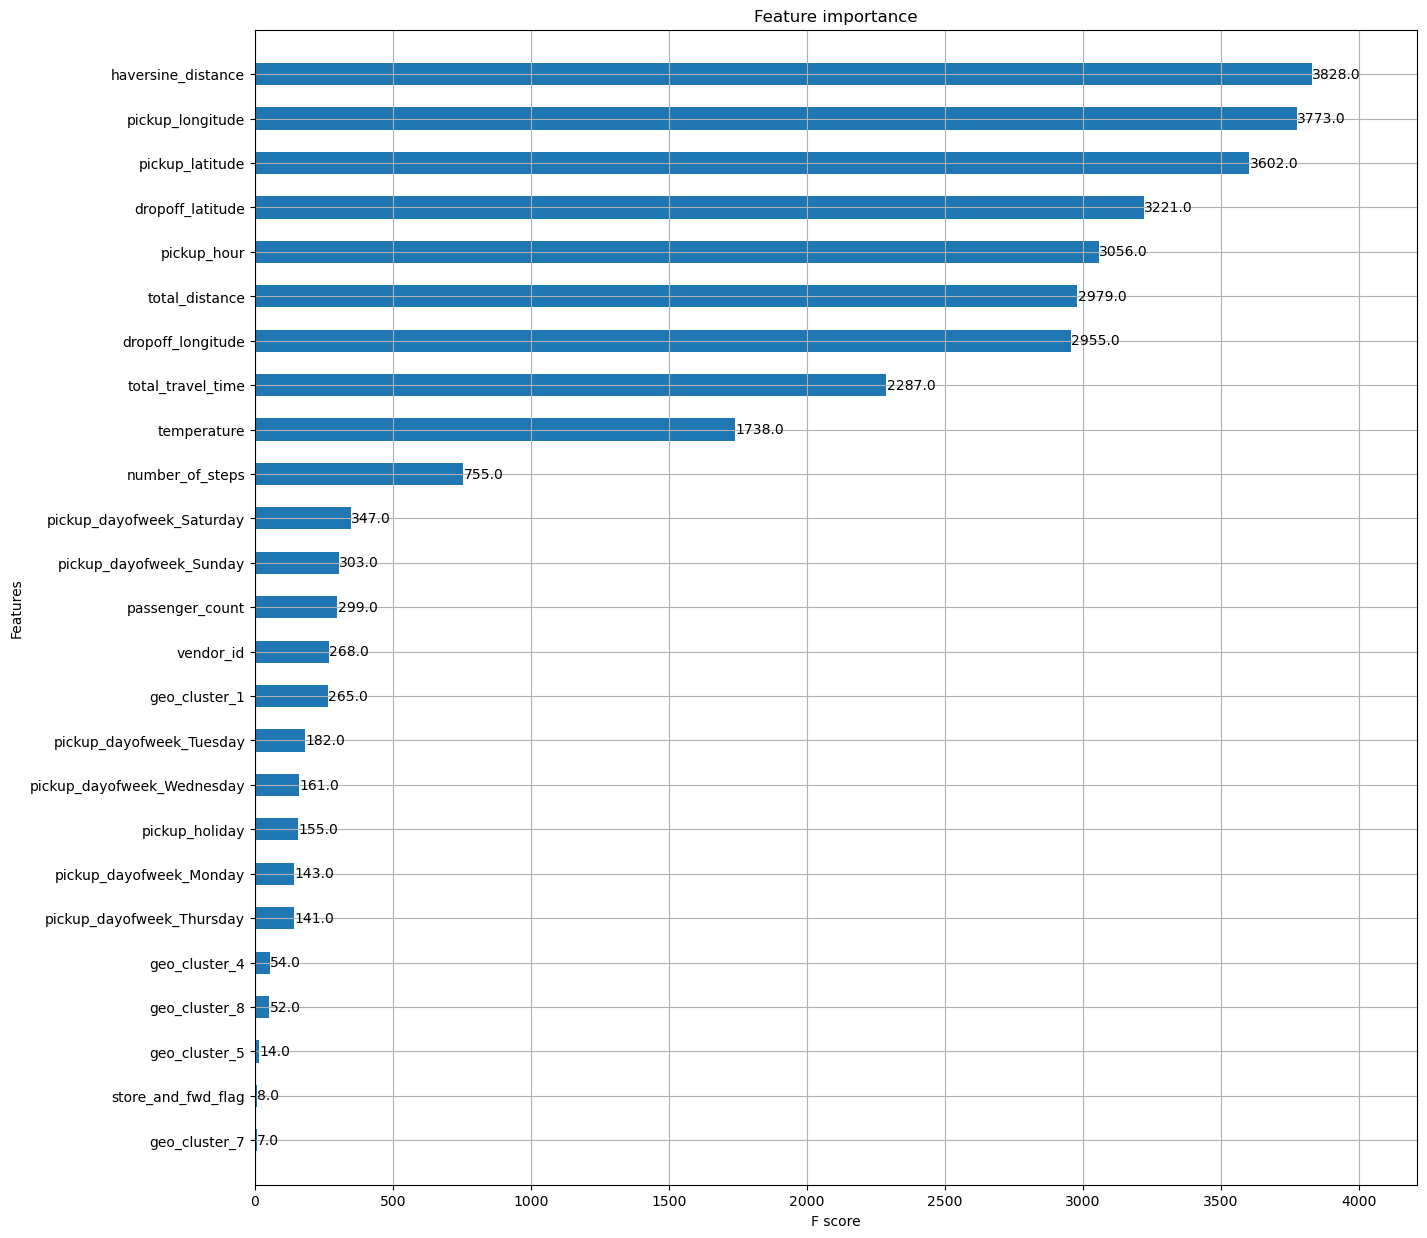

In [96]:
# формируем и выводим график важности признаков модели XGBoost
fig, ax = plt.subplots(figsize = (15,15))
xgb.plot_importance(model_xgb, ax = ax, height=0.5)

# 9. Дополнительные материалы

**<center>Open Source Routing Machine**

**[OSRM (Open Source Routing Machine)](https://en.wikipedia.org/wiki/Open_Source_Routing_Machine)** — это открытый бесплатный ресурс, который активно используется во многих сервисах, предполагающих построение кратчайшего маршрута. Он позволяет построить оптимальный кусочно-линейный путь из точки А в точку B, а также узнать его примерную длительность и длину. У данного сервиса есть API, с которым вы можете познакомиться в [документации](https://www.thinkdatascience.com/post/2020-03-03-osrm/osrm/).

[Сайт OSRM](http://project-osrm.org). [GitHub OSRM](https://github.com/Project-OSRM/osrm-backend/tree/master)

Проблема заключается в том, что, так как в наших данных содержится информация о более чем одном миллионе поездок, подгрузка данных с помощью API и их предобработка может занять несколько часов, а при слабом интернет-соединении — и дней. Поэтому мы заранее подготовили выгрузку данных из OSRM API для каждой поездки из тренировочной и тестовой выборок нашего набора данных.

Файлы с данными из OSRM для поездок из тренировочной таблицы вы можете найти [здесь](https://drive.google.com/file/d/1ecWjor7Tn3HP7LEAm5a0B_wrIfdcVGwR/view?usp=sharing). Наборы данных представлены в табличном формате CSV. Нас будут интересовать только следующие столбцы:

* id — идентификатор поездки;
* total_distance — кратчайшее дорожное расстояние (в метрах) из точки, в которой был включён счётчик, до точки, в которой счётчик был выключен (согласно OSRM);
* total_travel_time — наименьшее время поездки (в секундах) из точки, в которой был включён счётчик, до точки, в которой счётчик был выключен (согласно OSRM);
* number_of_steps — количество дискретных шагов, которые должен выполнить водитель (поворот налево/поворот направо/ехать прямо и т. д.).

**<center>Растояние по формуле гиверсинуса**

С помощью географических характеристик можно извлечь ещё немного информации. Если рассматривать Землю как сферу, то, зная широту и долготу начальной и конечной точек маршрута, можно вычислить географическое расстояние между точками на сфере, а также узнать направление движения автомобиля.

**Теория**

**Введём в наш анализ расстояние по формуле [гаверсинуса](https://www.geeksforgeeks.org/haversine-formula-to-find-distance-between-two-points-on-a-sphere/)**.

Данная формула определяет кратчайшее расстояние между двумя точками на сфере, если известны широта и долгота каждой из точек. Геометрически это длина кратчайшей дуги, связывающей точки на сфере.

![2](image/2.png)

![3](image/3.png)

In [97]:
# функция для расчета растояния гиверсинуса между точками
def get_haversine_distance(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # радиус Земли в километрах
    EARTH_RADIUS = 6371 
    # считаем кратчайшее расстояние h по формуле гаверсинуса
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

# функция для вычисления угла направления в градусах
def get_angle_direction(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha